# EDA

In [ ]:
#import all necessary libraries for the project
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import glob
import os
import cv2
from sklearn.svm import SVC
import shutil

In [ ]:
#direct the path to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/NLP_Final_Project/"

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_json(path + 'train.jsonl', lines=True)
dev_seen = pd.read_json(path + 'dev_seen.jsonl', lines=True)
dev_unseen = pd.read_json(path + 'dev_unseen.jsonl', lines=True)
dev_data = pd.concat([dev_seen, dev_unseen])
test_seen = pd.read_json(path + 'test_seen.jsonl', lines=True)
test_unseen = pd.read_json(path + 'test_unseen.jsonl', lines=True)
test_data = pd.concat([test_seen, test_unseen])

In [ ]:
print("Train Data:")
print(train_data.info())
print("\nDev Data:")
print(dev_data.info())
print("\nTest Data:")
print(test_data.info())

Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8500 non-null   int64 
 1   img     8500 non-null   object
 2   label   8500 non-null   int64 
 3   text    8500 non-null   object
dtypes: int64(2), object(2)
memory usage: 265.8+ KB
None

Dev Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 539
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1040 non-null   int64 
 1   img     1040 non-null   object
 2   label   1040 non-null   int64 
 3   text    1040 non-null   object
dtypes: int64(2), object(2)
memory usage: 40.6+ KB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3000 non-null   in

In [ ]:

# Step 3: Handle Missing Values (if any)
print("Missing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Dev Data:")
print(dev_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

Missing Values in Train Data:
id       0
img      0
label    0
text     0
dtype: int64

Missing Values in Dev Data:
id       0
img      0
label    0
text     0
dtype: int64

Missing Values in Test Data:
id       0
img      0
label    0
text     0
dtype: int64


In [ ]:
# Step 4: Data Types
print("Data Types in Train Data:")
print(train_data.dtypes)
print("\nData Types in Dev Data:")
print(dev_data.dtypes)
print("\nData Types in Test Data:")
print(test_data.dtypes)

Data Types in Train Data:
id        int64
img      object
label     int64
text     object
dtype: object

Data Types in Dev Data:
id        int64
img      object
label     int64
text     object
dtype: object

Data Types in Test Data:
id        int64
img      object
label     int64
text     object
dtype: object


In [ ]:
# Step 5: Descriptive Statistics
print("Descriptive Statistics for Train Data:")
print(train_data.describe())


Descriptive Statistics for Train Data:
                 id        label
count   8500.000000  8500.000000
mean   50006.595765     0.355176
std    28429.195025     0.478595
min     1235.000000     0.000000
25%    25840.000000     0.000000
50%    49834.000000     0.000000
75%    74332.250000     1.000000
max    98764.000000     1.000000


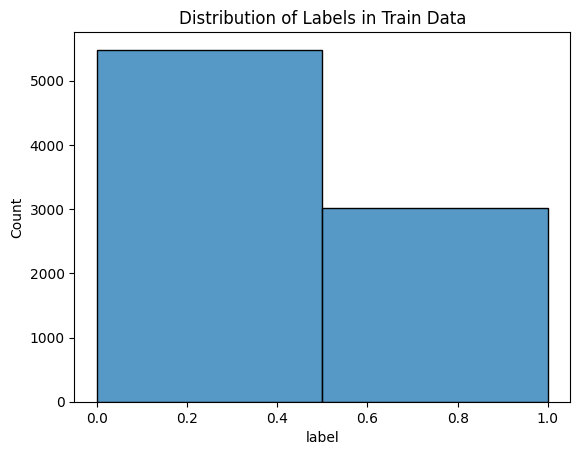

In [ ]:
# Step 6: Distribution Analysis
sns.histplot(train_data['label'], bins=2, kde=False)
plt.title('Distribution of Labels in Train Data')
plt.show()

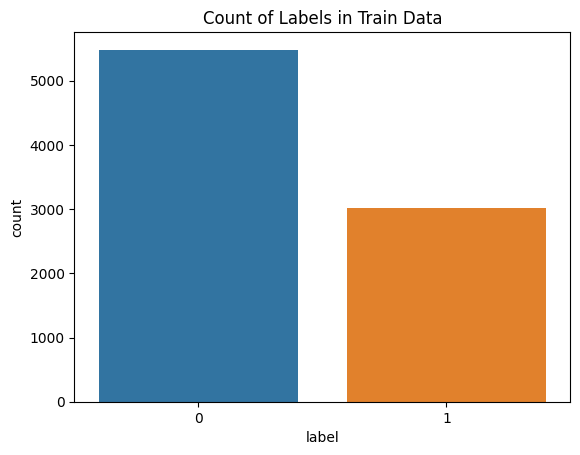

In [ ]:
# Step 7: Categorical Variables
sns.countplot(x='label', data=train_data)
plt.title('Count of Labels in Train Data')
plt.show()

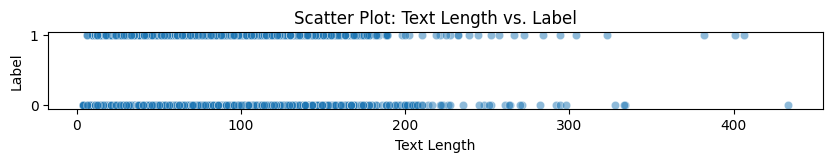

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_json(path+'train.jsonl', lines=True)

# Calculate text length
train_data['text_length'] = train_data['text'].apply(len)

# Scatter plot to explore the relationship between text length and label
plt.figure(figsize=(10, 1))
sns.scatterplot(x='text_length', y='label', data=train_data, alpha=0.5)
plt.title('Scatter Plot: Text Length vs. Label')
plt.xlabel('Text Length')
plt.ylabel('Label')
plt.show()


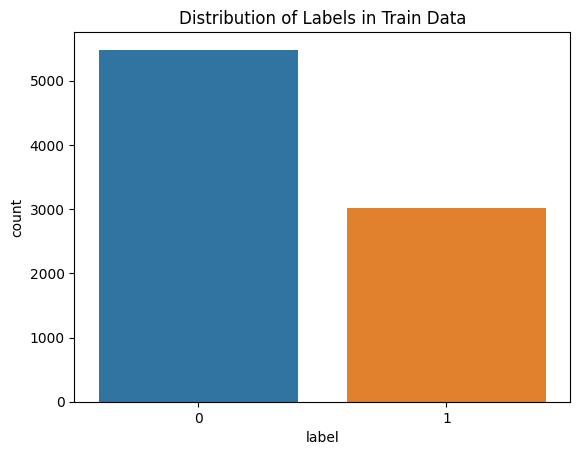

In [ ]:
# Step 9: Target Variable Analysis
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Labels in Train Data')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


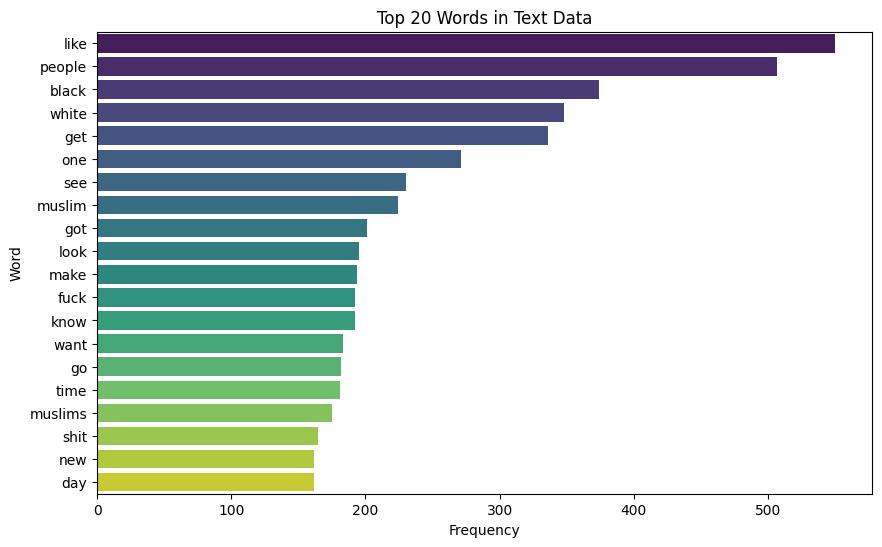

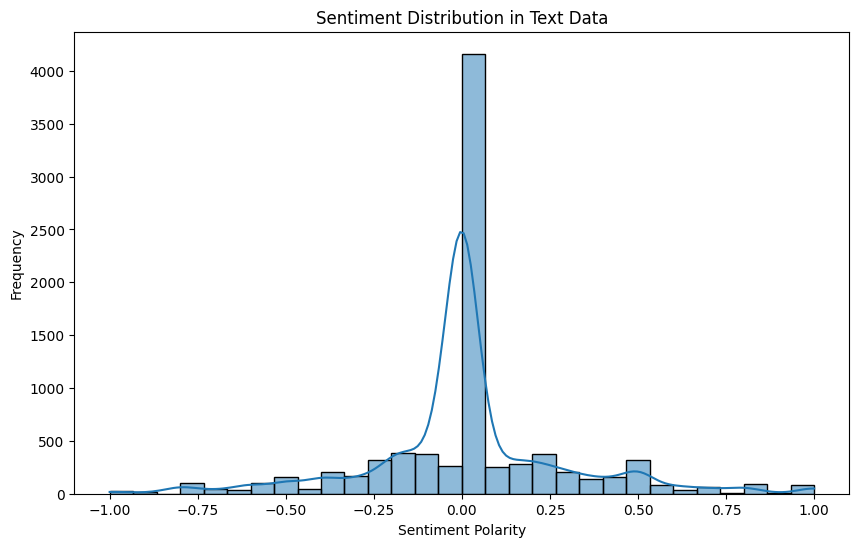

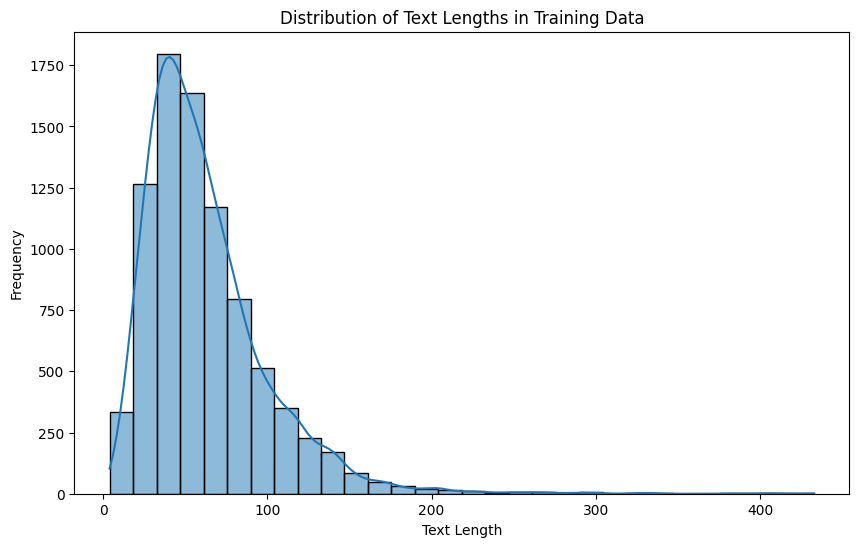

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
nltk.download('stopwords')

# Load the datasets
train_data = pd.read_json(path+'train.jsonl', lines=True)
dev_data = pd.read_json(path+'dev.jsonl', lines=True)
test_data = pd.read_json(path+'test.jsonl', lines=True)

# Step 10: Text Analysis
# Analyze word frequency in the training data
def analyze_word_frequency(text_data):
    words = ' '.join(text_data['text']).lower().split()
    stopwords_list = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stopwords_list]

    word_freq = pd.Series(filtered_words).value_counts()[:20]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')
    plt.title('Top 20 Words in Text Data')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

analyze_word_frequency(train_data)

# Step 10: Sentiment Analysis
def perform_sentiment_analysis(text_data):
    text_data['sentiment'] = text_data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

    plt.figure(figsize=(10, 6))
    sns.histplot(text_data['sentiment'], bins=30, kde=True)
    plt.title('Sentiment Distribution in Text Data')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

perform_sentiment_analysis(train_data)

# Step 10: Text Length Analysis
train_data['text_length'] = train_data['text'].apply(len)
dev_data['text_length'] = dev_data['text'].apply(len)
test_data['text_length'] = test_data['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(train_data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths in Training Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


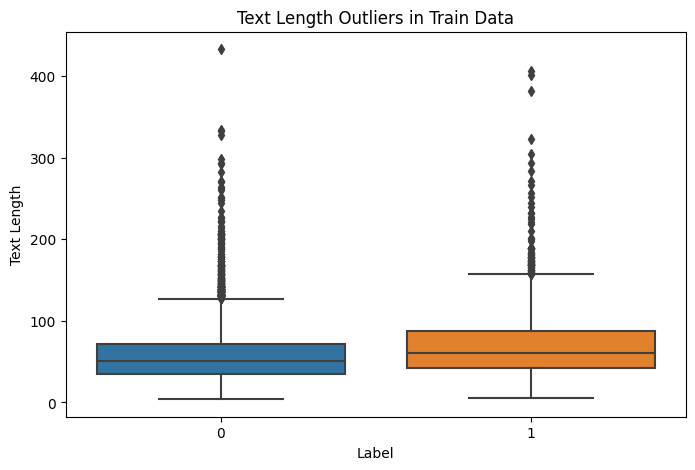

In [ ]:
# Outlier detection for train.jsonl
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='text_length', data=train_data)
plt.title('Text Length Outliers in Train Data')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

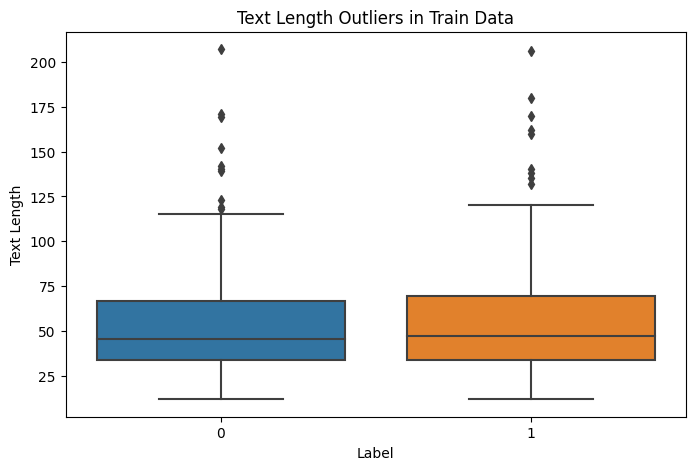

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='text_length', data=dev_data)
plt.title('Text Length Outliers in Train Data')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

In [ ]:
#Pre-processing
import pandas as pd
from sklearn.model_selection import train_test_split

# Split dev data into dev_seen and dev_unseen (1:1 ratio)
dev_seen, dev_unseen = train_test_split(dev_data, test_size=0.5, random_state=42)

# Split test data into test_seen and test_unseen (2:1 ratio)
test_seen, test_unseen = train_test_split(test_data, test_size=1/3, random_state=42)

# Optionally, save the splits to new files
dev_seen.to_json('dev_seen.jsonl', orient='records', lines=True)
dev_unseen.to_json('dev_unseen.jsonl', orient='records', lines=True)
test_seen.to_json('test_seen.jsonl', orient='records', lines=True)
test_unseen.to_json('test_unseen.jsonl', orient='records', lines=True)

In [ ]:
total_data = pd.concat([train_data,test_data, dev_data])

In [ ]:
total_data

id            img  label  \
0    42953  img/42953.png    0.0   
1    23058  img/23058.png    0.0   
2    13894  img/13894.png    0.0   
3    37408  img/37408.png    0.0   
4    82403  img/82403.png    0.0   
..     ...            ...    ...   
495  83675  img/83675.png    0.0   
496  37198  img/37198.png    0.0   
497  48670  img/48670.png    0.0   
498   9863  img/09863.png    0.0   
499  97320  img/97320.png    0.0   

                                                  text  sentiment  text_length  
0     its their character not their color that matters     0.0000           48  
1    don't be afraid to love again everyone is not ...    -0.0500           58  
2                             putting bows on your pet     0.0000           24  
3    i love everything and everybody! except for sq...    -0.0875           70  
4    everybody loves chocolate chip cookies, even h...     0.0000           51  
..                                                 ...        ...          ...  
495                   i'm gonna be like phelps one day        NaN           32  
496  when you're so relaxed you can feel yourself g...        NaN           65  
497  look at this sandwich maker club i found on wi...        NaN           61  
498                             diverse group of women        NaN           22  
499  "when your dishwasher is broken so you take it...        NaN           80  

[10000 rows x 6 columns]

In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
nltk.download('punkt')
nltk.download('wordnet')

# Define cleaning functions
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags and URLs
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# List of datasets
datasets = [train_data, test_seen, test_unseen, dev_seen, dev_unseen]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Loop through datasets
for dataset_name in datasets:
    # Read the dataset
    df = dataset_name  # Replace with the actual file path
    text = df['text']
    # Apply cleaning function to 'text' column and replace the original text
    df['text'] = df['text'].apply(clean_text)

<ipython-input-51-2d48aee1edee>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [ ]:
total_data

id            img  label  \
0    42953  img/42953.png    0.0   
1    23058  img/23058.png    0.0   
2    13894  img/13894.png    0.0   
3    37408  img/37408.png    0.0   
4    82403  img/82403.png    0.0   
..     ...            ...    ...   
495  83675  img/83675.png    0.0   
496  37198  img/37198.png    0.0   
497  48670  img/48670.png    0.0   
498   9863  img/09863.png    0.0   
499  97320  img/97320.png    0.0   

                                                  text  sentiment  text_length  
0                               character color matter     0.0000           48  
1                    dont afraid love everyone like ex    -0.0500           58  
2                                      putting bow pet     0.0000           24  
3    love everything everybody except squirrel hate...    -0.0875           70  
4      everybody love chocolate chip cooky even hitler     0.0000           51  
..                                                 ...        ...          ...  
495                      im gon na like phelps one day        NaN           32  
496                   youre relaxed feel go next level        NaN           65  
497      look sandwich maker club found wish clearance        NaN           61  
498                                diverse group woman        NaN           22  
499    dishwasher broken take back walmart get new one        NaN           80  

[10000 rows x 6 columns]

# TextCNN

In [ ]:
testData = pd.read_json(path+'dev_seen.jsonl',lines=True)
devUnseenData= pd.read_json(path+'dev_unseen.jsonl',lines=True)
finalTestData=pd.read_json(path+'test_seen.jsonl',lines=True)
testUnseenData=pd.read_json(path+'test_unseen.jsonl',lines=True)
trainData=pd.read_json(path+'train.jsonl',lines=True)

trainData = pd.concat([trainData,testData])
trainData = pd.concat([trainData,devUnseenData])
trainData = pd.concat([trainData,finalTestData])
trainData = pd.concat([trainData,testUnseenData])
trainData[:1492]

id            img  label  \
0     42953  img/42953.png      0   
1     23058  img/23058.png      0   
2     13894  img/13894.png      0   
3     37408  img/37408.png      0   
4     82403  img/82403.png      0   
...     ...            ...    ...   
1487  92187  img/92187.png      0   
1488  79032  img/79032.png      1   
1489  85097  img/85097.png      1   
1490  49861  img/49861.png      1   
1491  34620  img/34620.png      1   

                                                   text  
0      its their character not their color that matters  
1     don't be afraid to love again everyone is not ...  
2                              putting bows on your pet  
3     i love everything and everybody! except for sq...  
4     everybody loves chocolate chip cookies, even h...  
...                                                 ...  
1487                 don't let this group get you downs  
1488  kids shouldn't run with scissors lesbians shou...  
1489  woke up last night to find my tv floating acro...  
1490  ready for the cupcake? wake up and smell the b...  
1491     nice boobs i guess it's a tranny omg a shemale  

[1492 rows x 4 columns]

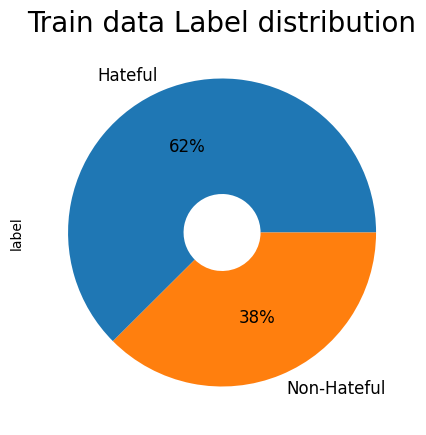

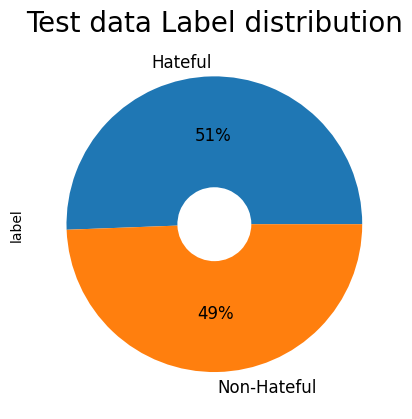

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Train data Label distribution', fontsize=20)
trainData.label.value_counts().plot(kind='pie', labels=['Hateful', 'Non-Hateful'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%',
                              textprops={'fontsize': 12})
plt.show()
plt.title('Test data Label distribution', fontsize=20)
testData.label.value_counts().plot(kind='pie', labels=['Hateful', 'Non-Hateful'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%',
                              textprops={'fontsize': 12})
plt.show()

In [ ]:
from collections import Counter
with open("vocab.txt", 'w', encoding='utf-8') as fout:
    fout.write("<unk>\n")
    fout.write("<pad>\n")
    vocab = [word for word, freq in Counter(j for i in trainData["text"] for j in i).most_common() if freq>1]
    for i in vocab:
        fout.write(i+"\n")

In [ ]:
with open("vocab.txt", encoding='utf-8') as fin:
    vocab = [i.strip() for i in fin]
charToidx = {i:index for index, i in enumerate(vocab)}
idxTochar = {index:i for index, i in enumerate(vocab)}
vocabSize = len(vocab)
padId = charToidx["<pad>"]
unkId = charToidx["<unk>"]

In [ ]:
sequence_length = 385
def tokenizer():
    inputs = []
    sentenceChar = [[j for j in i] for i in trainData["text"]]
    for index,i in enumerate(sentenceChar):
        temp = [charToidx.get(j,unkId) for j in i]
        if len(temp) < sequence_length:
            for _ in range(sequence_length-len(temp)):
                temp.append(padId)
        else:
            temp = temp[:sequence_length]
        inputs.append(temp)
    return inputs
data_input = tokenizer()

In [ ]:
myList = [2, 1, 3, 5, 1, 1, 1, 0]
valueToBeRemoved = 0

result = filter(lambda val: val !=  valueToBeRemoved, myList)
print(list(result))

[2, 1, 3, 5, 1, 1, 1]


In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Embedding_size = 100
Batch_Size = 32
Kernel = 3
Filter_num = 10
Epoch = 30
Dropout = 0.5
Learning_rate = 1e-3

In [ ]:
class TextCNNDataSet(Data.Dataset):
    def __init__(self, data_inputs, data_targets):
        self.inputs = torch.LongTensor(data_inputs)
        self.label = torch.LongTensor(data_targets)

    def __getitem__(self, index):
        return self.inputs[index], self.label[index]

    def __len__(self):
        return len(self.inputs)

TextCNNDataSet = TextCNNDataSet(data_input, list(trainData["label"]))
trainSize = int(len(data_input) * 0.8)
testSize = len(data_input) - trainSize
trainDataset, testDataset = torch.utils.data.random_split(TextCNNDataSet, [trainSize, testSize])

TrainDataLoader = Data.DataLoader(trainDataset, batch_size=Batch_Size, shuffle=True)
TestDataLoader = Data.DataLoader(testDataset, batch_size=Batch_Size, shuffle=True)

In [ ]:

num_classs = 2
class TextCNN(nn.Module):
    def __init__(self):
        super(TextCNN, self).__init__()
        self.W = nn.Embedding(vocabSize, embedding_dim=Embedding_size)
        outChannel = Filter_num
        self.conv = nn.Sequential(
                    nn.Conv2d(1, outChannel, (2, Embedding_size)),
                    nn.ReLU(),
                    nn.MaxPool2d((sequence_length-1,1)),
        )
        #self.dropout = nn.Dropout(Dropout)
        self.fc = nn.Linear(outChannel, num_classs)

    def forward(self, X):
        batch_size = X.shape[0]
        embeddingX = self.W(X) # [batch_size, sequence_length, embedding_size]
        embeddingX = embeddingX.unsqueeze(1) # add channel(=1) [batch, channel(=1), sequence_length, embedding_size]
        conved = self.conv(embeddingX)# [batch_size, output_channel, 1, 1]
        #conved = self.dropout(conved)
        flatten = conved.view(batch_size, -1)# [batch_size, output_channel*1*1]
        output = self.fc(flatten)
        return output

In [ ]:
model = TextCNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(),lr=Learning_rate)

In [ ]:
def binary_acc(pred, y):
    correct = torch.eq(pred, y).float()
    acc = correct.sum() / len(correct)
    return acc.item()

In [ ]:
def train():
    avg_acc = []
    predtrain = np.array([])
    y_train = np.array([])
    model.train()
    for index, (batch_x, batch_y) in enumerate(TrainDataLoader):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        pred1 = model(batch_x)
        loss = criterion(pred1, batch_y)
        acc = binary_acc(torch.max(pred1, dim=1)[1], batch_y)
        avg_acc.append(acc)
        predtrain = np.append(predtrain, torch.max(pred1, dim=1)[1].detach().cpu().numpy())
        y_train = np.append(y_train, batch_y.detach().cpu().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_acc = np.array(avg_acc).mean()
    return avg_acc,y_train,predtrain

In [ ]:
def evaluate():
    avg_acc = []
    prediction = np.array([])
    y_test = np.array([])
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in TestDataLoader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            pred = model(x_batch)
            acc = binary_acc(torch.max(pred, dim=1)[1], y_batch)
            avg_acc.append(acc)
            prediction = np.append(prediction, torch.max(pred, dim=1)[1].detach().cpu().numpy())
            y_test = np.append(y_test, y_batch.detach().cpu().numpy())
    return np.array(avg_acc).mean(),y_test.flatten(),prediction.flatten()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
evaluate()

(0.39583333308183694,
 array([1., 0., 1., ..., 0., 1., 0.]),
 array([1., 1., 0., ..., 1., 1., 1.]))

In [ ]:
_,y_train,predtrain = train()
print(_)

0.6334593949044586


In [ ]:
_, y_test,prediction = evaluate()
print(_)

0.6110232064995584


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
auc_score = roc_auc_score(y_test,prediction)
LR_matrix = confusion_matrix(y_test,prediction)
print(LR_matrix)
print(auc_score)
print(metrics.classification_report(prediction, y_test))

[[1158  375]
 [ 600  375]]
0.5699984946560289
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.70      1758
         1.0       0.38      0.50      0.43       750

    accuracy                           0.61      2508
   macro avg       0.57      0.58      0.57      2508
weighted avg       0.64      0.61      0.62      2508



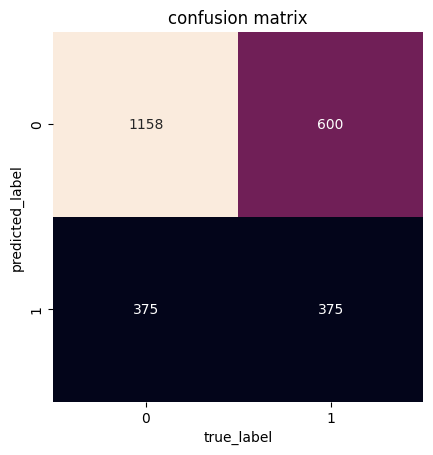

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(LR_matrix .T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true_label')
plt.ylabel('predicted_label')
plt.title("confusion matrix");

In [ ]:

cnn_train_acc, cnn_test_acc = [], []

for epoch in range(1, Epoch+1):
    train_acc,y_train,predtrain = train()
    print('epoch={},Training accuracy={}'.format(epoch, train_acc))
    test_acc,y_test,prediction = evaluate()
    print("epoch={},Testing accuracy={}".format(epoch, test_acc))
    cnn_train_acc.append(train_acc)
    cnn_test_acc.append(test_acc)

epoch=1,Training accuracy=0.6428144904458599
epoch=1,Testing accuracy=0.6252637128286724
epoch=2,Training accuracy=0.6493829617834395
epoch=2,Testing accuracy=0.6428006329113924
epoch=3,Training accuracy=0.6557523885350318
epoch=3,Testing accuracy=0.6424050632911392
epoch=4,Training accuracy=0.6614251592356688
epoch=4,Testing accuracy=0.6409546416017073
epoch=5,Training accuracy=0.6660031847133758
epoch=5,Testing accuracy=0.6472837551485134
epoch=6,Training accuracy=0.6663017515923567
epoch=6,Testing accuracy=0.6381856542599352
epoch=7,Training accuracy=0.6634156050955414
epoch=7,Testing accuracy=0.6524261605890491
epoch=8,Training accuracy=0.6666003184713376
epoch=8,Testing accuracy=0.6501845989046218
epoch=9,Training accuracy=0.6668988853503185
epoch=9,Testing accuracy=0.6479430379746836
epoch=10,Training accuracy=0.6694864649681529
epoch=10,Testing accuracy=0.6352848101265823
epoch=11,Training accuracy=0.669984076433121
epoch=11,Testing accuracy=0.6474156115628495
epoch=12,Training 

In [ ]:
# Create the roc curve
testfpr, testTpr, a = roc_curve(y_test, prediction, pos_label = 1)
train_fpr, trainTpr, b = roc_curve(y_train, predtrain, pos_label = 1)

# Create a dataframe of fpr and tpr to create visual
testRocDf = pd.DataFrame({'fpr': testfpr, 'tpr': testTpr, 'data':['test']*len(testTpr)})
trainRocDf = pd.DataFrame({'fpr': train_fpr, 'tpr': trainTpr, 'data': ['train'] * len(trainTpr)})
rocDf = pd.concat([testRocDf, trainRocDf])
plt.rcParams['figure.dpi'] = 1200
plt.figure(figsize=(8, 6))
#plt.plot(trainRocDf['fpr'], trainRocDf['tpr'],label = 'train')
plt.plot(testRocDf['fpr'], testRocDf['tpr'],label='ROC curve (area = %0.2f)' % auc_score,color='darkorange',)
plt.legend()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC For Text-CNN')

Text(0.5, 1.0, 'ROC For Text-CNN')

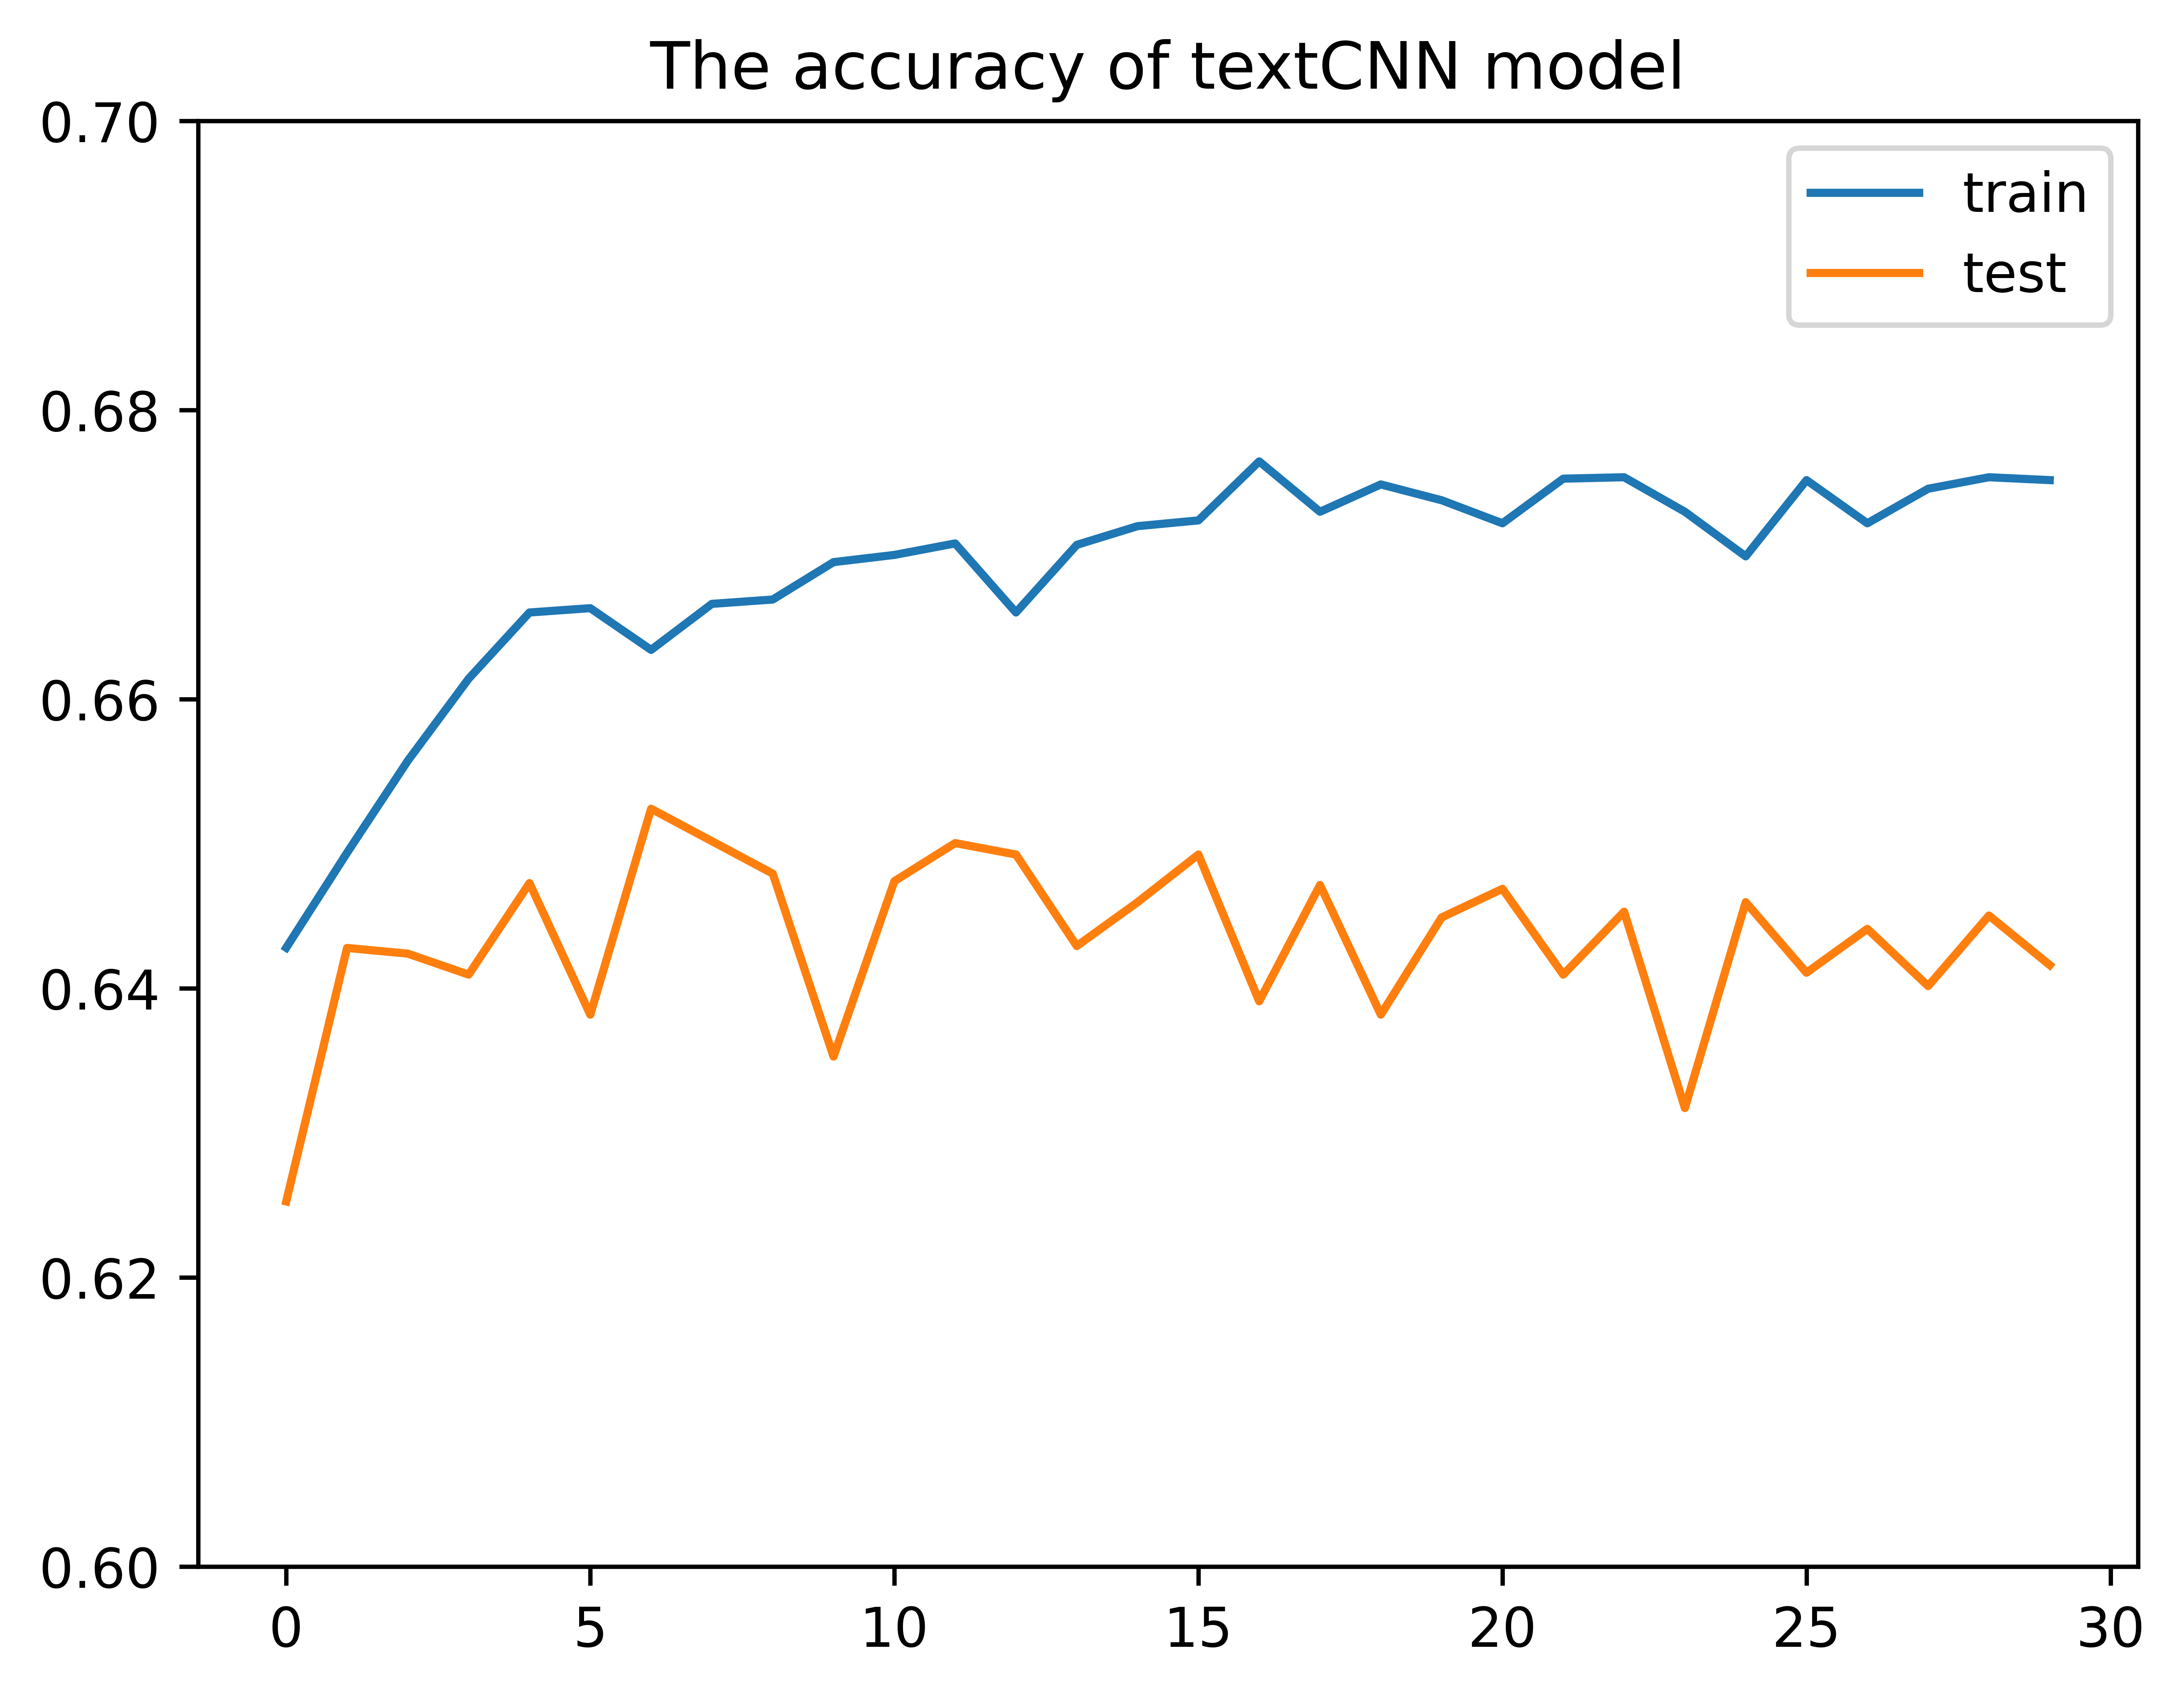

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cnn_train_acc)
plt.plot(cnn_test_acc)
plt.ylim(ymin=0.6, ymax=0.7)
plt.title("The accuracy of textCNN model")
plt.legend(["train", 'test'])
plt.show()

# Face Recognition

In [ ]:
dev_seen_data= pd.read_json(path+'dev_seen.jsonl',lines=True)
dev_unseen_data= pd.read_json(path+'dev_unseen.jsonl',lines=True)
test_seen_data=pd.read_json(path+'test_seen.jsonl',lines=True)
test_unseen_data=pd.read_json(path+'test_unseen.jsonl',lines=True)
train_data=pd.read_json(path+'train.jsonl',lines=True)

In [ ]:
data = pd.concat([train_data,test_seen_data,test_unseen_data,dev_seen_data,dev_unseen_data])
data1 = data.drop_duplicates(subset=['img'])

In [ ]:
data1

id            img  label  \
0    42953  img/42953.png      0   
1    23058  img/23058.png      0   
2    13894  img/13894.png      0   
3    37408  img/37408.png      0   
4    82403  img/82403.png      0   
..     ...            ...    ...   
135  82054  img/82054.png      0   
136  13749  img/13749.png      0   
137  85067  img/85067.png      0   
138  20541  img/20541.png      0   
139  60724  img/60724.png      0   

                                                  text  
0     its their character not their color that matters  
1    don't be afraid to love again everyone is not ...  
2                             putting bows on your pet  
3    i love everything and everybody! except for sq...  
4    everybody loves chocolate chip cookies, even h...  
..                                                 ...  
135                                puzzle level expert  
136  it's amazing how animal bodies and the human b...  
137              rare image of a worker picking cotton  
138               caught me cat and monkey today! this  
139  to the black guy reading this meme i am your f...  

[12140 rows x 4 columns]

In [ ]:
path = '/content/drive/MyDrive/NLP_Final_Project/'
path2 = '/content/drive/MyDrive/NLP_Final_Project/face/'
for each in data1['img']:
  img_path = path + each
  img = cv2.imread(img_path)
  FaceEngine = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
  facesResult = FaceEngine.detectMultiScale(img,scaleFactor=1.3,minNeighbors=5)
  if facesResult != ():
    max_area = 0
    max_cordinate = None
    for (x,y,w,h) in facesResult:
      area = h * w
      if area > max_area:
        max_area = area
        max_cordinate = (x,y,w,h)

    cropped = img[max_cordinate[1]:max_cordinate[1]+max_cordinate[3], max_cordinate[0]:max_cordinate[0]+max_cordinate[2]]
    pic2 = cv2.resize(cropped, (128,128), interpolation=cv2.INTER_AREA)
    cv2.imwrite(path2 + each[4:] , pic2)


In [ ]:
import csv
# Specify the directory path in Google Drive
directory_path = path2

# Get the list of files in the directory
files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

In [ ]:
csv_file_path = '/content/drive/MyDrive/NLP_Final_Project/facetype.csv'
# Write the CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = ['FaceType', 'Img']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Write rows with FaceType=0 and id=file name
    for file_name in files:
        writer.writerow({'FaceType': 0, 'Img': file_name})

print(f'CSV file created at: {csv_file_path}')

CSV file created at: /content/drive/MyDrive/NLP_Final_Project/facetype.csv


In [ ]:
facedata = pd.read_csv(csv_file_path)
facedata

FaceType        Img
0            0  43571.png
1            0  68172.png
2            0  17869.png
3            0  62307.png
4            0  84639.png
...        ...        ...
4484         0  57042.png
4485         0  48136.png
4486         0  05372.png
4487         0  46870.png
4488         0  31896.png

[4489 rows x 2 columns]

In [ ]:
dev_seen= pd.read_json(path+'dev_seen.jsonl',lines=True)
dev_unseen= pd.read_json(path+'dev_unseen.jsonl',lines=True)
test_seen=pd.read_json(path+'test_seen.jsonl',lines=True)
test_unseen=pd.read_json(path+'test_unseen.jsonl',lines=True)
train=pd.read_json(path+'train.jsonl',lines=True)

In [ ]:
data = pd.concat([train,test_seen,test_unseen,dev_seen,dev_unseen])
data

id            img  label  \
0    42953  img/42953.png      0   
1    23058  img/23058.png      0   
2    13894  img/13894.png      0   
3    37408  img/37408.png      0   
4    82403  img/82403.png      0   
..     ...            ...    ...   
535  83675  img/83675.png      0   
536  37198  img/37198.png      0   
537  48670  img/48670.png      0   
538   9863  img/09863.png      0   
539  97320  img/97320.png      0   

                                                  text  
0     its their character not their color that matters  
1    don't be afraid to love again everyone is not ...  
2                             putting bows on your pet  
3    i love everything and everybody! except for sq...  
4    everybody loves chocolate chip cookies, even h...  
..                                                 ...  
535                   i'm gonna be like phelps one day  
536  when you're so relaxed you can feel yourself g...  
537  look at this sandwich maker club i found on wi...  
538                             diverse group of women  
539  "when your dishwasher is broken so you take it...  

[12540 rows x 4 columns]

In [ ]:
data1 = data.drop_duplicates(subset=['img'])
np.dtype(data1['id'])

dtype('int64')

In [ ]:
facedata['id']=[int(x[:-4]) for x in facedata['Img']]
facetype = facedata[facedata['FaceType']==0]
facedata

FaceType        Img     id
0            0  43571.png  43571
1            0  68172.png  68172
2            0  17869.png  17869
3            0  62307.png  62307
4            0  84639.png  84639
...        ...        ...    ...
4484         0  57042.png  57042
4485         0  48136.png  48136
4486         0  05372.png   5372
4487         0  46870.png  46870
4488         0  31896.png  31896

[4489 rows x 3 columns]

In [ ]:
facetype = pd.merge(data1, facedata, on=['id'], how='left')
facetype = facetype.drop('Img', axis=1)
facetype

id            img  label  \
0      42953  img/42953.png      0   
1      23058  img/23058.png      0   
2      13894  img/13894.png      0   
3      37408  img/37408.png      0   
4      82403  img/82403.png      0   
...      ...            ...    ...   
12135  82054  img/82054.png      0   
12136  13749  img/13749.png      0   
12137  85067  img/85067.png      0   
12138  20541  img/20541.png      0   
12139  60724  img/60724.png      0   

                                                    text  FaceType  
0       its their character not their color that matters       NaN  
1      don't be afraid to love again everyone is not ...       NaN  
2                               putting bows on your pet       NaN  
3      i love everything and everybody! except for sq...       NaN  
4      everybody loves chocolate chip cookies, even h...       NaN  
...                                                  ...       ...  
12135                                puzzle level expert       NaN  
12136  it's amazing how animal bodies and the human b...       NaN  
12137              rare image of a worker picking cotton       NaN  
12138               caught me cat and monkey today! this       0.0  
12139  to the black guy reading this meme i am your f...       NaN  

[12140 rows x 5 columns]

In [ ]:
facetype0 = facetype[facetype['FaceType']==0]
facetype0

id            img  label  \
9      58306  img/58306.png      0   
10     79351  img/79351.png      1   
12     25489  img/25489.png      1   
14     79346  img/79346.png      0   
15     13426  img/13426.png      0   
...      ...            ...    ...   
12117  76132  img/76132.png      0   
12124  62094  img/62094.png      0   
12132  46291  img/46291.png      0   
12134  91847  img/91847.png      0   
12138  20541  img/20541.png      0   

                                                    text  FaceType  
9      what is he hiding? we need to see his tax retu...       0.0  
10                              jew mad? get fuhrerious!       0.0  
12      brother... a day without a blast is a day wasted       0.0  
14     voting for hillary is like letting casey antho...       0.0  
15                                they will soon be free       0.0  
...                                                  ...       ...  
12117                    we need to stop suicide bombers       0.0  
12124  this human rights movement started because of ...       0.0  
12132               i am mad when it's not all about me!       0.0  
12134                 if mind your business was a person       0.0  
12138               caught me cat and monkey today! this       0.0  

[4489 rows x 5 columns]

In [ ]:
data_0 = facetype0[facetype0['label']==0]
data_1 = facetype0[facetype0['label']==1]

In [ ]:
import shutil
for index, row in data_0.iterrows():
    path = '/content/drive/MyDrive/NLP_Final_Project/'+row['img']
    target = '/content/drive/MyDrive/NLP_Final_Project/all_images/image_0/' +str(row['id'])+'.png'
    shutil.copy(path,target)

In [ ]:
for index, row in data_1.iterrows():
    path = '/content/drive/MyDrive/NLP_Final_Project/'+row['img']
    target = '/content/drive/MyDrive/NLP_Final_Project/all_images/image_1/' +str(row['id'])+'.png'
    shutil.copy(path,target)

# Object Detection

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/107.7 GB disk)


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/NLP_Final_Project/label_csv/'
dev_seen_data= pd.read_csv(path+'dev_seen.csv')
dev_unseen_data= pd.read_csv(path+'dev_unseen.csv')
test_seen_data=pd.read_csv(path+'test_seen.csv')
test_unseen_data=pd.read_csv(path+'test_unseen.csv')
train_data=pd.read_csv(path+'train.csv')

In [ ]:
test_unseen_data

id            img  label  \
0     15740  img/15740.png      1   
1     38794  img/38794.png      1   
2     60792  img/60792.png      1   
3     71824  img/71824.png      1   
4      4796  img/04796.png      1   
...     ...            ...    ...   
1995  71352  img/71352.png      0   
1996   2164  img/02164.png      0   
1997   3587  img/03587.png      0   
1998  47839  img/47839.png      0   
1999  34281  img/34281.png      0   

                                                   text  
0                     when someone tells you how to bbq  
1      when they say white folks don't know how to cook  
2                                the original derp-face  
3                  okay here you go! you piece of shit!  
4                        xboxone farming 1619 simulator  
...                                                 ...  
1995                            fighting for gay rights  
1996  that feeling when you finish your homework in ...  
1997                   the day that shook new york city  
1998       one of the first prototypes of the atom bomb  
1999  today feels like a kinda day where i just wann...  

[2000 rows x 4 columns]

In [ ]:
data = pd.concat([train_data,test_seen_data,test_unseen_data,dev_seen_data,dev_unseen_data])
data1 = data.drop_duplicates(subset=['img'])

In [ ]:
path2 = '/content/drive/MyDrive/NLP_Final_Project/'

In [ ]:
data1['img']

0      img/42953.png
1      img/23058.png
2      img/13894.png
3      img/37408.png
4      img/82403.png
           ...      
135    img/82054.png
136    img/13749.png
137    img/85067.png
138    img/20541.png
139    img/60724.png
Name: img, Length: 12140, dtype: object

In [ ]:
data_detect = data1.head(1000)
data_detect['img']

0      img/42953.png
1      img/23058.png
2      img/13894.png
3      img/37408.png
4      img/82403.png
           ...      
995    img/54692.png
996    img/01642.png
997    img/46150.png
998    img/19438.png
999    img/45730.png
Name: img, Length: 1000, dtype: object

In [ ]:
objects = {}
for each in data_detect['img']:
  print(each)
  img_path = path2 + each
  model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
  results = model(img_path)
  object1 = results.pandas().xyxy[0]['name'].unique()
  print(object1)
  objects[each] = object1

img/42953.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/23058.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/13894.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cat' 'teddy bear']
img/37408.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/82403.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/16952.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/76932.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['sheep' 'dog' 'cow']
img/70914.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/02973.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/58306.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/79351.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/34096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['keyboard']
img/25489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/19324.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'couch' 'chair']
img/79346.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/13426.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'umbrella' 'kite']
img/97628.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'couch' 'bed']
img/14238.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/28936.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'couch']
img/59784.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bus']
img/02146.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bird']
img/70146.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/28061.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'skateboard']
img/97180.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/49752.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'cup']
img/25610.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'car']
img/15872.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/72640.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/64318.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cake']
img/17956.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/93547.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/10743.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'umbrella' 'car' 'dog']
img/37091.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bottle' 'cup' 'bowl' 'knife' 'broccoli' 'spoon']
img/25719.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'car' 'potted plant']
img/76825.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'handbag']
img/72598.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair']
img/43078.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'book']
img/51846.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bird']
img/01569.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'potted plant' 'spoon' 'bowl' 'scissors']
img/95812.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/06418.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/53976.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/70193.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/60427.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['cat']
img/78395.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'tennis racket' 'spoon']
img/04876.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/92075.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/86354.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/74386.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/59613.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/10263.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/48279.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['clock']
img/52610.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/58371.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'dog']
img/27401.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/89574.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/25473.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/47913.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/08295.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/02497.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/90471.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'cup' 'tie']
img/69357.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/54602.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'dog']
img/15320.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'book']
img/63182.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['surfboard']
img/20619.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/82457.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/81059.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/42137.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/74530.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'pizza' 'orange' 'tie' 'dining table' 'chair' 'knife']
img/40832.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/46127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bottle']
img/87594.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['teddy bear']
img/12548.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/12894.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/02476.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/06937.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/05762.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/40259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bed']
img/85072.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/46537.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/56432.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/39805.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/29163.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/36072.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cake']
img/60147.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/90583.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/38612.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bottle']
img/52097.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/34961.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cat']
img/15803.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/89762.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/38465.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/53289.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'banana' 'sports ball']
img/75321.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/18350.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'book']
img/91547.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['wine glass' 'cell phone' 'person']
img/30247.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/93741.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'skateboard']
img/51243.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/05384.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/01845.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/34791.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/41385.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/34508.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/80521.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
img/34165.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'dog']
img/93072.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/25468.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/09617.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['baseball bat']
img/96258.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'skis']
img/96578.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/35618.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'couch']
img/05249.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'book']
img/57349.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'teddy bear']
img/78409.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/29814.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bottle']
img/20568.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['sheep' 'person']
img/84269.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['spoon']
img/68079.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bird']
img/41537.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/12890.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/54102.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/63217.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/03271.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/35264.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/63710.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'potted plant' 'cup']
img/12348.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/14052.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['kite']
img/81064.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/74391.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone' 'laptop']
img/36152.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/80256.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/21948.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/70532.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/25806.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'truck']
img/26759.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/27398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['horse']
img/18730.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'backpack' 'handbag']
img/75216.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cow']
img/91754.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'potted plant']
img/42153.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sports ball' 'frisbee']
img/83456.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/18673.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['chair' 'person' 'banana']
img/97523.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'dog']
img/24631.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/23748.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/69412.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['wine glass' 'cup']
img/59073.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'car' 'cell phone']
img/28405.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['car' 'person' 'cell phone']
img/63492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/92670.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/78351.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/79856.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair' 'toothbrush']
img/71436.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/03258.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/20736.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'umbrella']
img/50487.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/06431.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/51473.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/34901.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'horse']
img/28793.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/05172.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/98501.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cell phone' 'person' 'toilet']
img/96231.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/81673.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'kite']
img/48635.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/43612.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/15480.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/41830.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/81069.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/72584.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'cell phone']
img/51763.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['bird']
img/06873.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/08523.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/06359.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cup' 'person' 'chair' 'laptop' 'dining table' 'knife']
img/93260.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/40839.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair']
img/08516.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/53012.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bus']
img/76250.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/26198.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/61952.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/80269.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/05712.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/72941.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/21853.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['car']
img/35219.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/90146.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/51278.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/63095.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/96058.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/56871.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['tie' 'person']
img/25180.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/37259.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/48106.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/19352.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cow']
img/65213.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair']
img/24368.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/58426.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'baseball glove' 'baseball bat']
img/96785.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/40567.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['chair' 'person' 'book']
img/38625.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/04823.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/25368.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/93826.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/56392.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bear']
img/30986.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cake' 'person']
img/75823.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/84072.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/93147.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/92874.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/27946.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'potted plant' 'handbag']
img/93614.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/93521.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bus']
img/02691.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/91708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bottle']
img/25783.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/16098.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/30452.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/86491.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/14530.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/81734.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/04683.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/08593.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['horse' 'person']
img/92608.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/61453.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/39601.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'chair']
img/12035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/56482.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cup' 'person' 'knife' 'dining table' 'bottle']
img/56287.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/19036.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/34852.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/62804.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/81579.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/80247.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['horse' 'dog']
img/52890.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sheep']
img/02485.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/50793.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone' 'laptop']
img/13857.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/43617.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/70942.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/49601.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/35102.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/10659.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['sandwich' 'knife' 'person' 'potted plant']
img/36081.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['donut' 'sports ball' 'cell phone']
img/68325.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/39256.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/98362.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/38475.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'book']
img/49083.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cow' 'sheep']
img/45938.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/67823.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'car']
img/70928.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bottle' 'person' 'car']
img/24309.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/70925.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'book']
img/05269.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/61278.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sports ball']
img/81675.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/38629.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['dog' 'person' 'tie']
img/06458.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'donut']
img/71364.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bear' 'sheep']
img/26794.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/85704.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/75102.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/91268.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bird']
img/42179.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'backpack' 'dog']
img/35097.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'sheep']
img/83570.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/56490.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/07968.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/81259.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person' 'bottle']
img/19753.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/61480.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/54790.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/43517.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/25068.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/35861.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/92741.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/51736.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/26417.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/18407.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['teddy bear']
img/47326.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/50768.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['wine glass' 'person' 'cup']
img/86594.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['giraffe']
img/63581.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/95426.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/10264.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/79312.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['car' 'bicycle' 'dog' 'person' 'bird']
img/17832.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'stop sign']
img/15432.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cat' 'dog' 'couch' 'person']
img/34506.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/30492.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/31794.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/04175.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['tie' 'person']
img/61578.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['teddy bear' 'person']
img/31479.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/17659.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/29785.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/17205.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/74132.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/15649.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['vase']
img/51460.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/60329.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
img/58276.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/40752.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'car']
img/79315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/03241.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/38041.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/40897.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/56180.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/37865.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/36974.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['sports ball']
img/61780.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/81546.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/75432.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['dog']
img/48703.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/81706.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/42319.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/02139.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/93568.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/06832.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/20971.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/70936.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'frisbee']
img/04278.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/56024.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'baseball glove']
img/53941.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/49270.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['orange' 'cat']
img/67485.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/92417.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'couch']
img/26305.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bowl' 'knife' 'oven' 'toaster']
img/61234.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'baseball bat' 'tennis racket']
img/59064.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cup' 'wine glass']
img/17634.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cat']
img/03246.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/97635.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'chair' 'bottle' 'dining table' 'knife' 'book' 'cup']
img/09634.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/49630.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['cake']
img/60173.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'umbrella']
img/38490.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/68423.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/76258.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'wine glass']
img/39652.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/70435.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['chair' 'person' 'book']
img/08654.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/37402.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/26795.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'train']
img/60317.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/34805.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/01389.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cat' 'person']
img/80361.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/74536.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['potted plant' 'person']
img/15283.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/75340.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/96153.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/63917.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cow' 'sheep']
img/38529.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/92016.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/79054.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/06471.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/07698.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bear']
img/01896.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/76354.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sheep' 'dog']
img/80237.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/71045.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/67084.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/68507.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/58096.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/04263.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/26043.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/26031.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cup' 'bottle' 'pizza' 'dining table' 'knife']
img/64701.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/26495.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/81963.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/56972.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/83127.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/10827.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'chair']
img/56378.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/50273.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cup' 'person' 'oven' 'sink' 'bowl']
img/25397.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'teddy bear']
img/46058.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/06218.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/02849.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
img/69042.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'pizza']
img/41853.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/70652.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/27943.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'motorcycle']
img/68159.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bicycle' 'potted plant']
img/91704.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/94823.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/63285.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'motorcycle' 'car']
img/42693.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/64027.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'baseball glove']
img/20751.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tennis racket']
img/94351.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['teddy bear']
img/27489.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/81394.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/59467.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/71906.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/81265.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/67384.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/21086.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/40153.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/31025.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/68042.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cup' 'spoon']
img/70549.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/48612.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tennis racket']
img/05183.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/27430.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/13859.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/68379.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/25037.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/16380.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/25861.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/59478.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/71249.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/12673.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/74235.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
img/63275.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/17830.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/48625.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cup']
img/93216.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/19256.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/43201.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/38127.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/53962.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/76213.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/28317.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie' 'book' 'mouse']
img/03251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/09132.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'baseball bat' 'tie']
img/54973.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/04651.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/78560.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/95317.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/16490.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/13876.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'truck']
img/80239.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['tie' 'person']
img/19540.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/61927.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'motorcycle']
img/52903.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/56389.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/64805.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/74038.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/86530.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cup' 'tie']
img/92450.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cat']
img/79103.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/94721.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/89042.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'laptop' 'chair' 'suitcase']
img/27034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/67198.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/09347.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/54276.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'baseball glove' 'donut']
img/36472.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/15938.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'car' 'handbag']
img/87049.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cup']
img/54761.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bear' 'bird']
img/30628.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/91375.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/87530.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/05129.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/34658.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['zebra' 'cat']
img/42387.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/67415.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'baseball bat']
img/86054.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/29517.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/28704.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['sports ball' 'person']
img/72531.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'dog' 'frisbee']
img/27953.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/07249.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/75403.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/30948.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/38245.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sports ball' 'chair']
img/89160.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/93658.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/32046.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/04568.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/54817.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'cell phone']
img/42786.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/58197.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/92185.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog' 'car' 'cow']
img/38704.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['donut' 'person']
img/75481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['sheep' 'cow']
img/42309.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'book' 'surfboard' 'tie']
img/04253.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/28971.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/26741.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'clock']
img/03685.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'backpack' 'horse']
img/40286.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/14695.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/59837.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone' 'bowl' 'sink' 'cup']
img/54397.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog' 'frisbee']
img/07192.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/01392.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'cell phone']
img/67219.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['bowl' 'dining table']
img/14697.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['tv']
img/68194.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/32468.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cat']
img/01524.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/60937.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/75428.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/67512.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/83492.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/94617.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/65320.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/32765.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/04326.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['cup' 'person' 'bowl' 'cell phone']
img/65413.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/76034.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/52986.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/36981.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sports ball']
img/63140.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/68307.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/75182.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/89610.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/69137.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie']
img/17829.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/90165.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'couch']
img/37641.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/32485.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['chair' 'person' 'potted plant' 'bowl']
img/78906.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/41258.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['potted plant' 'bowl' 'vase']
img/04296.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bicycle' 'person' 'tie']
img/56841.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/01658.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/85062.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/89740.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/53278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['sheep' 'baseball bat']
img/67159.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/95683.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/85271.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone' 'handbag' 'suitcase']
img/16409.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/17504.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/62739.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/85421.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'backpack' 'umbrella']
img/29731.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/74152.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'couch']
img/61802.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'horse' 'umbrella']
img/96143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/53714.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'car']
img/79358.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/34920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'backpack']
img/63415.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/51734.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/80534.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/61485.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/89603.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/16784.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cow' 'dog']
img/80169.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/54936.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/83290.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/97816.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['cat']
img/73562.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'cell phone']
img/42368.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/15743.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/96073.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/85362.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/25968.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/40965.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/41568.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cup']
img/71289.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/08172.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bus' 'car' 'person']
img/60128.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'car']
img/84703.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/04325.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cup']
img/07258.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/98764.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'baseball bat']
img/04162.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/06357.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/68947.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/25639.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/52738.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['cat']
img/47598.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/09716.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/08632.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/78520.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/82763.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/38427.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cell phone' 'person']
img/38156.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/62358.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/48317.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/20759.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'clock']
img/76328.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['umbrella']
img/20879.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/62435.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/62849.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['teddy bear']
img/19586.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/84120.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cat']
img/81630.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/41032.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'handbag']
img/35910.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/07591.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/62081.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/85923.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'bed']
img/45912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['bird']
img/87031.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'donut']
img/06483.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/64130.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['tie' 'person']
img/31074.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone' 'bottle' 'dining table']
img/82637.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/12349.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'scissors']
img/43128.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/29761.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bottle' 'cup' 'bowl' 'person' 'donut' 'dining table']
img/17495.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/15409.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/59317.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/78469.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['scissors']
img/12867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'clock']
img/26497.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cow']
img/65980.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cat']
img/27139.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'airplane' 'handbag']
img/23690.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['vase']
img/64853.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/01492.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'skateboard']
img/97542.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sheep']
img/98561.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'bottle']
img/18597.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['dog']
img/92467.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/73204.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'handbag' 'cell phone']
img/58604.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'apple']
img/93086.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['car' 'dog' 'person' 'horse']
img/16278.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cat']
img/40932.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/96824.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'kite']
img/92453.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cup' 'tie' 'person']
img/89162.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/82379.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/31765.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['tie' 'person']
img/72504.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/10492.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'car' 'handbag']
img/67894.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/78124.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/48756.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/41803.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/78465.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/42015.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/67214.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/37548.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/73241.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/27816.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'cake' 'potted plant']
img/79613.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tennis racket']
img/86051.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair']
img/03957.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['clock']
img/18693.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/23061.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/67809.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/72893.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/59231.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cell phone' 'person' 'couch' 'laptop']
img/59346.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/32768.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/76138.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/15902.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog' 'sheep' 'bench']
img/23849.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/60729.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sheep']
img/54976.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bowl' 'dining table' 'spoon']
img/36480.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/46251.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/45698.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/79286.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'book']
img/01526.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tv' 'keyboard' 'cell phone' 'dining table']
img/75832.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/91283.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/16539.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/95108.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/95174.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/45706.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'truck']
img/40291.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/39821.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/41923.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/32714.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/85960.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/46910.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/46178.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/80924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/81094.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/37809.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bear']
img/62314.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sports ball']
img/81436.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/29376.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'car']
img/96508.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/76892.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/13096.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'dog' 'sheep' 'umbrella']
img/94710.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['bear' 'dog']
img/52496.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/56708.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bottle' 'tv' 'chair']
img/27605.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'handbag']
img/80792.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/42317.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/23715.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/14360.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/74631.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/82134.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bottle' 'cell phone']
img/76814.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['bowl' 'person' 'dining table']
img/75928.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'chair' 'toothbrush' 'scissors']
img/13459.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/92867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'horse' 'remote']
img/02519.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/21354.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/73810.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/47862.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/94378.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/86912.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/52974.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'remote']
img/87203.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/32051.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/40896.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/05984.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/65328.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'dining table']
img/15630.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/80629.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/73596.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bear' 'sheep' 'bird']
img/21346.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/20835.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/13690.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/07983.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['sports ball' 'person']
img/15648.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/34675.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cup' 'person' 'laptop' 'handbag' 'chair' 'dining table']
img/59684.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/25706.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'backpack']
img/03298.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bed' 'person' 'couch' 'tv' 'handbag']
img/53204.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cow']
img/62514.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/59376.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/89061.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/73045.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bird']
img/43675.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['cat']
img/18203.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/26034.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/67984.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/62408.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bird']
img/30958.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['horse' 'suitcase']
img/35218.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/96840.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/83510.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/67109.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/29813.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie' 'toothbrush']
img/68715.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/92478.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/91423.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/13068.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/69542.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/19247.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/03187.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'bottle']
img/03574.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/92514.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cup']
img/89102.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/10538.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/05841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/28074.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/34862.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/24581.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'car' 'backpack' 'handbag']
img/70843.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/31568.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/60592.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'handbag']
img/15824.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/64017.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['cup' 'person' 'bottle']
img/63871.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['chair' 'person' 'cell phone' 'book']
img/41562.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/20876.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['motorcycle']
img/21908.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/76851.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['truck']
img/67431.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['zebra']
img/65124.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'cup' 'cell phone']
img/46902.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/85426.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/04798.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog' 'giraffe']
img/31897.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/93275.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bear']
img/47618.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'laptop' 'chair' 'wine glass' 'clock' 'microwave' 'orange' 'banana' 'refrigerator' 'dining table' 'cup']
img/81975.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/85729.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/54917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/69158.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/86451.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/10328.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'car']
img/71485.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/71583.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/21403.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/95482.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/79610.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/76140.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/35917.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/01475.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/49185.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/16480.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/20617.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog' 'tie']
img/16058.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/70849.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/78306.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/97623.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/92314.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/52406.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/71230.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/90786.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/62458.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/40137.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/38069.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie' 'cell phone']
img/20819.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'horse' 'cow' 'sheep']
img/20163.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/50248.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/83619.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair' 'handbag' 'dining table']
img/26459.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/30412.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/97035.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'cow']
img/74602.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['truck']
img/93650.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/95742.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/93410.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'suitcase' 'dog']
img/75203.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/54286.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'dog']
img/02841.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/93076.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['toilet']
img/89407.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/65728.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'boat' 'car']
img/75841.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['cow' 'person']
img/38624.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/36187.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['umbrella' 'person']
img/47095.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/51746.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'dog']
img/32876.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/21408.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'potted plant' 'bed']
img/64513.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/10527.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'umbrella']
img/45891.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/21096.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'cell phone']
img/57043.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/85413.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'truck']
img/06392.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'skateboard']
img/97316.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['cat']
img/47290.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/03971.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/65237.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tv' 'bottle' 'wine glass']
img/53017.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/13769.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/73258.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['tie' 'person']
img/90278.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/34186.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/70594.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bird']
img/74019.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/34581.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/13486.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/18607.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bed' 'person' 'bench']
img/36048.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/16283.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['horse']
img/72058.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/70315.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/49076.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person' 'tie']
img/98351.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cup' 'bottle']
img/57164.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/35460.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'baseball glove']
img/69342.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/63295.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'knife' 'bowl']
img/87504.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/85614.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/18650.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'potted plant' 'bench']
img/83014.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/41986.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/50867.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/51092.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/20945.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/91562.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sheep']
img/81720.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/78031.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/84351.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/69078.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog' 'cat']
img/58463.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['vase' 'mouse']
img/05123.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'cell phone']
img/53924.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['fork' 'person' 'spoon' 'dining table']
img/90481.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/30847.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/71392.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog' 'couch']
img/25640.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'cell phone' 'bed']
img/52931.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/50461.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair' 'wine glass']
img/83941.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]
img/70654.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'handbag' 'umbrella']
img/71398.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['clock' 'tie' 'person' 'cup']
img/37182.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/48920.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'wine glass']
img/06439.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/05798.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sports ball']
img/59261.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/09831.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/75138.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/35412.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/89170.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'baseball glove']
img/30276.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/81263.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/32089.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['wine glass' 'person']
img/92081.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/71052.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/45960.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/19630.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/18275.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/45836.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/87610.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/82154.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/49128.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/73652.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/07124.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/45780.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['chair' 'bottle' 'person' 'potted plant' 'vase']
img/58301.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'backpack']
img/86907.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bird']
img/45291.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/50473.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['wine glass']
img/89475.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/02769.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'donut']
img/13964.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/15690.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['donut' 'person' 'tie']
img/06239.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/94678.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/39164.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'sports ball']
img/71839.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/74861.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'handbag' 'suitcase']
img/80532.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'teddy bear' 'bed' 'chair']
img/57861.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/20134.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['orange']
img/96531.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'dining table']
img/06798.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'skis']
img/62017.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'remote']
img/92157.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['teddy bear']
img/63702.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/58326.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'horse']
img/82356.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['cat']
img/37250.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog' 'person']
img/24197.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/69018.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'clock']
img/90582.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/92146.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/83074.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/75210.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/08259.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'sports ball']
img/26930.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'car' 'handbag']
img/75410.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['dog']
img/72456.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'cell phone']
img/80347.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/67319.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/53678.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/57029.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/71826.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/89573.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/67402.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair' 'wine glass' 'dining table' 'cup' 'tie']
img/65139.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/36597.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie' 'bottle' 'wine glass']
img/67852.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/40217.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie' 'frisbee']
img/86143.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair']
img/24130.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/93671.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'tie']
img/07615.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/36581.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/98032.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'sandwich']
img/91738.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/53241.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/13249.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



[]
img/94361.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


['person']
img/51768.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'bicycle' 'suitcase']
img/58029.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/20379.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'frisbee']
img/75698.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'laptop' 'chair' 'potted plant']
img/29063.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'handbag']
img/80341.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/45036.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'car' 'handbag']
img/09265.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['umbrella' 'person']
img/19458.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/71403.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/94062.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/06197.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'tie']
img/56274.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'cat']
img/63952.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['dog']
img/92546.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'suitcase']
img/92436.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/98573.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['donut']
img/15078.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/70384.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'banana' 'orange']
img/83219.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['bear']
img/51489.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['teddy bear' 'dog' 'cat']
img/07215.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['dog' 'person' 'cell phone']
img/30687.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/73251.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'chair']
img/52340.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/28604.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/07312.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'couch' 'cell phone']
img/80217.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'truck']
img/06893.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


[]
img/93068.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/53184.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person' 'truck']
img/02947.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['sheep' 'person']
img/06153.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['bird']
img/94850.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['sheep' 'person']
img/32750.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/81953.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/58091.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/98256.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['tie' 'person']
img/54319.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person' 'vase']
img/94360.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/54692.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/01642.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/46150.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 


['person']
img/19438.png


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU



['person']
img/45730.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[]


In [ ]:
objects

{'img/42953.png': array(['person', 'tie'], dtype=object),
 'img/23058.png': array(['person', 'tie'], dtype=object),
 'img/13894.png': array(['cat', 'teddy bear'], dtype=object),
 'img/37408.png': array(['dog'], dtype=object),
 'img/82403.png': array(['tie', 'person'], dtype=object),
 'img/16952.png': array(['person'], dtype=object),
 'img/76932.png': array(['sheep', 'dog', 'cow'], dtype=object),
 'img/70914.png': array(['person'], dtype=object),
 'img/02973.png': array([], dtype=object),
 'img/58306.png': array(['person'], dtype=object),
 'img/79351.png': array(['person'], dtype=object),
 'img/34096.png': array(['keyboard'], dtype=object),
 'img/25489.png': array(['person'], dtype=object),
 'img/19324.png': array(['person', 'couch', 'chair'], dtype=object),
 'img/79346.png': array(['person'], dtype=object),
 'img/13426.png': array(['person', 'umbrella', 'kite'], dtype=object),
 'img/97628.png': array(['person', 'couch', 'bed'], dtype=object),
 'img/14238.png': array(['person'], dtype=o

# Emotion Race & Age Detection

In [ ]:
import torch
import torchvision.transforms as transforms

from vision_utils.custom_torch_utils import load_model
from vision_utils.custom_architectures import SepConvModelMT, SepConvModel, initialize_model,PretrainedMT

from emotion_detection.evaluate import evaluate_model as eval_fer
from emotion_detection.fer_data_utils import get_fer_dataloader
from emotion_detection.train import run_fer

from multitask_rag.train import run_utk
from multitask_rag.utk_data_utils import get_utk_dataloader
from multitask_rag.evaluate import evaluate_model as eval_utk
from multitask_rag.utk_data_utils import display_examples_utk

import pandas as pd
import glob
import os
import random

In [ ]:
pathOfResnet = r'/Users/rak/Documents/Capstone_Project/resnet_model_21_val_loss=4.275671.pth'

In [ ]:
model = PretrainedMT(model_name='resnet').to(device)

In [ ]:
model.module.load_state_dict(torch.load(pathOfResnet, map_location='cpu'))

In [ ]:
DataForFace = facetype['FaceType']

In [ ]:
data = pd.concat([train,test_seen,test_unseen,dev_seen,dev_unseen])
data

In [ ]:
data1 = data.drop_duplicates(subset=['img'])
np.dtype(data1['id'])

In [ ]:
DataForFace['id']=[int(x[:-4]) for x in DataForFace['Img']]
TypeOfFace = DataForFace[DataForFace['TypeOfFace']==0]
DataForFace

In [ ]:
TypeOfFace = pd.merge(data1, DataForFace, on=['id'])
TypeOfFace

In [ ]:
TypeOfFace0 = TypeOfFace[TypeOfFace['TypeOfFace']==0]
TypeOfFace0

In [ ]:
data_0 = TypeOfFace0[TypeOfFace0['label']==0]
data_1 = TypeOfFace0[TypeOfFace0['label']==1]

In [ ]:
import torch
import torch.nn.functional as F
import tqdm
import numpy as np
from vision_utils.custom_torch_utils import plot_confusion_matrix
from vision_utils.custom_torch_utils import processing_time
from torchvision import transforms
import time

In [ ]:
data_path_test = "/Users/rak/Documents/NLP__Project/face"
test_dataset = torchvision.datasets.ImageFolder(root=data_path_test,
                                                transform=transforms.Compose([transforms.Resize((128, 128)),
                                                transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=24,
                                          shuffle=False)

In [ ]:
def evaluate_model(model, dataloader,
                   labels_=[[0, 1], [0, 1, 2, 3, 4]],
                   target_names=[['Male', 'Female'], ['White', 'Black', 'Asian', 'Indian', 'Unknown']],
                   normalize=False):
    """
        Function for evaluating a classification model by printing/plotting classification report and confusion matrix

        :param model: a pytorch trained model
        :param dataloader: a pytorch DataLoader object, or any object that yields pytorch tensors
                ready to be used by the model
        :param title: a string to be used as the plot title
        :param labels_: list  of lists , each sublist is a list of integers (0 to number of classes - 1) representing
                        labels for an output from the model
        :param target_names: list of lists, each sublist is a list of strings or ints that describe the labels,
                            and must have the same length as the corresponding labels it describes from `labels`list
        :param normalize: whether to show the actual values or in % for the confusion matrix
        :return:
        """

    y_age = []
    y_gender = []
    y_race = []
    y_pred_age = []
    y_pred_gender = []
    y_pred_race = []

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # first, get the predictions
    model.eval()  # set model in evaluation mode
    model = model.to(device)

    with torch.no_grad():
        # Iterate over data.
        for images, labels in tqdm.tqdm(dataloader):
            images = images.to(device, dtype=torch.float32)

            age_pred, gender_pred, race_pred = model(images)
            y_pred_age.append(age_pred.to('cpu').numpy())
            _, gender_pred = torch.max(gender_pred, 1)
            _, race_pred = torch.max(race_pred, 1)
            y_pred_gender.append(gender_pred.to('cpu').numpy())
            y_pred_race.append(race_pred.to('cpu').numpy())
    return y_pred_age,y_pred_gender,y_pred_race

In [ ]:
y_pred_age,y_pred_gender,y_pred_race = evaluate_model(model, test_loader)

In [ ]:
imgs_pred = dict()
for i in range(len(label)):
    imgs_pred[test_dataset.imgs[i][0]] = predict[i].tolist()

#BERT

In [ ]:
import torch
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:
import plotly.graph_objects as go

In [ ]:
path = "/content/drive/MyDrive/NLP_Final_Project/"

In [ ]:
import pandas as pd
testData = pd.read_json(path+'dev_seen.jsonl',lines=True)
devUnseenData= pd.read_json(path+'dev_unseen.jsonl',lines=True)
finalTestData=pd.read_json(path+'test_seen.jsonl',lines=True)
testUnseenData=pd.read_json(path+'test_unseen.jsonl',lines=True)
trainData=pd.read_json(path+'train.jsonl',lines=True)
testData.head()

id            img  label  \
0   8291  img/08291.png      1   
1  46971  img/46971.png      1   
2   3745  img/03745.png      1   
3  83745  img/83745.png      1   
4  80243  img/80243.png      1   

                                                text  
0              white people is this a shooting range  
1                              bravery at its finest  
2  your order comes to $37.50 and your white priv...  
3  it is time.. to send these parasites back to t...  
4                             mississippi wind chime

In [ ]:
# Create the tokenizer
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case=True
)

In [ ]:
tokenizer('Adorable African Kid Appreciating life')

{'input_ids': [101, 23677, 3060, 4845, 10439, 2890, 7405, 3436, 2166, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.decode(tokenizer('Adorable African Kid Appreciating life')['input_ids'])

'[CLS] adorable african kid appreciating life [SEP]'

In [ ]:
# Adapted from Coursera guided project "Sentiment Analysis with BERT"
encodedDataTrain = tokenizer.batch_encode_plus(
    trainData.text.values,
    add_special_tokens=True, # set this so BERT knows when a sentence ends and begins
    return_attention_mask=True, #using a fixed input, all sentences have same dimensionality. Tells us where actual values are and where zeros are
    padding = True, # make sure to pad sentences so they are all the same length
    max_length = 256, # this is the length we want all senteces to be
    return_tensors = 'pt'
)

encodedDataVal = tokenizer.batch_encode_plus(
    testData.text.values,
    add_special_tokens=True, # set this so BERT knows when a sentence ends and begins
    return_attention_mask=True, #using a fixed input, all sentences have same dimensionality. Tells us where actual values are and where zeros are
    padding = True, # make sure to pad sentences so they are all the same length
    max_length = 256, # this is the length we want all senteces to be
    return_tensors = 'pt'
)

encodedFinalTest= tokenizer.batch_encode_plus(
    finalTestData.text.values,
    add_special_tokens=True, # set this so BERT knows when a sentence ends and begins
    return_attention_mask=True, #using a fixed input, all sentences have same dimensionality. Tells us where actual values are and where zeros are
    padding = True, # make sure to pad sentences so they are all the same length
    max_length = 256, # this is the length we want all senteces to be
    return_tensors = 'pt'
)

# get the parts from the encoding that need to train the model
inputIdsTrain = encodedDataTrain['input_ids']
attentionMasksTrain = encodedDataTrain['attention_mask']
labelsTrain = torch.tensor(trainData.label.values)

inputIdsVal = encodedDataVal['input_ids']
attentionMasksVal = encodedDataVal['attention_mask']
labelsVal = torch.tensor(testData.label.values)

inputIdsFinalTest = encodedFinalTest['input_ids']
attentionMasksFinalTest = encodedFinalTest['attention_mask']
labelsFinalTest = torch.tensor(finalTestData.label.values)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [ ]:
datasetTrain = TensorDataset(inputIdsTrain, attentionMasksTrain, labelsTrain)
datasetVal = TensorDataset(inputIdsVal, attentionMasksVal, labelsVal)
datasetFinalTest = TensorDataset(inputIdsFinalTest, attentionMasksFinalTest, labelsFinalTest)

In [ ]:
print(len(datasetTrain))
print(len(datasetVal))
print(len(datasetFinalTest))

8500
500
1000


In [ ]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(trainData.label.unique()),
    output_attentions=False,
    output_hidden_states=False
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Adapted from Coursera guided project "Sentiment Analysis with BERT"
batch_size=32

dataloaderTrain=DataLoader(
    datasetTrain,
    sampler=RandomSampler(datasetTrain),
    batch_size=batch_size
)

dataloaderVal=DataLoader(
    datasetVal,
    sampler=RandomSampler(datasetVal),
    batch_size=32
)

dataloaderFinalTest = DataLoader(
    datasetFinalTest,
    batch_size=32
)

In [ ]:
# Adam is a stochastic optimization
Target_optimizer = AdamW(
    model.parameters(),
    lr= 1e-5, #2e-5 > 5e -5
    eps=1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
epochs = 30

scheduler = get_linear_schedule_with_warmup(
    Target_optimizer,
    num_warmup_steps=0,
    num_training_steps=len(dataloaderTrain) *epochs
)

In [ ]:
def auc(preds, labels):
    predsFlat=np.argmax(preds, axis=1).flatten()
    labelsFlat=labels.flatten()
    return roc_auc_score(labelsFlat, predsFlat)

In [ ]:
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val) #usually if using GPU

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cpu


In [ ]:
def evaluate(dataloaderVal):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloaderVal):

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloaderVal)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals


In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    model.train() # put model in training mode

    loss_train_total = 0

    progress_bar = tqdm(dataloaderTrain,
                        desc='Epoch {:1d}'.format(epoch),
                       leave = False,
                       disable = False)
    for batch in progress_bar:

        model.zero_grad() # set the gradient to zero

        batch = tuple(b.to(device) for b in batch) # make sure each item on device

        # get the inputs to the model
        inputs = {
            'input_ids': batch[0],
            'attention_mask' : batch[1],
            'labels': batch[2]
        }

        # get the outputs
        outputs = model(**inputs)

        #BERT returns loss and logits
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward() # backpropagation

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # prevents gradient from getting too small or too big

        Target_optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

    torch.save(model.state_dict(), f'/content/drive/MyDrive/NLP_Final_Project/models/BERT2_ft_epoch{epoch}.model')
    tqdm.write('\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloaderTrain)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_value = evaluate(dataloaderVal)
    val_AUC = auc(predictions, true_value)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'AUC Score: {val_AUC}')

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(trainData.label.unique()),
                                                      output_attentions=False,
                                                      output_hidden_states=False)
model.to(device)
pass

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# load a pretrained model
model.load_state_dict(
    torch.load('/content/drive/MyDrive/NLP_Final_Project/models/BERT2_ft_epoch6.model',
    map_location = torch.device('cpu'))
)

<All keys matched successfully>

In [ ]:
# Get the predictions for the hold out test set
_, predictions, true_vals = evaluate(dataloaderFinalTest)

  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
# Get the predictions for the training set
_, train_predictions, train_true_vals = evaluate(dataloaderTrain)

  0%|          | 0/266 [00:00<?, ?it/s]

In [ ]:
from sklearn import metrics
#print(metrics.classification_report(predictions, true_vals))
pred = predictions[:,1]
pred = np.where(pred > 0, pred, 0)
pred = np.where(pred <= 0, pred, 1)

pred
print(metrics.classification_report(pred, true_vals))

              precision    recall  f1-score   support

         0.0       0.87      0.56      0.68       800
         1.0       0.27      0.67      0.39       200

    accuracy                           0.58      1000
   macro avg       0.57      0.61      0.53      1000
weighted avg       0.75      0.58      0.62      1000



In [ ]:
# Get the AUC on the hold out test set
final_test_auc = auc(predictions, true_vals)
train_auc = auc(train_predictions, train_true_vals)
print(final_test_auc)
print(train_auc)

0.5751300520208084
0.8888796425774873


In [ ]:
!pip install -q plotly==5.0.0

In [ ]:
#import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ROC Curve')

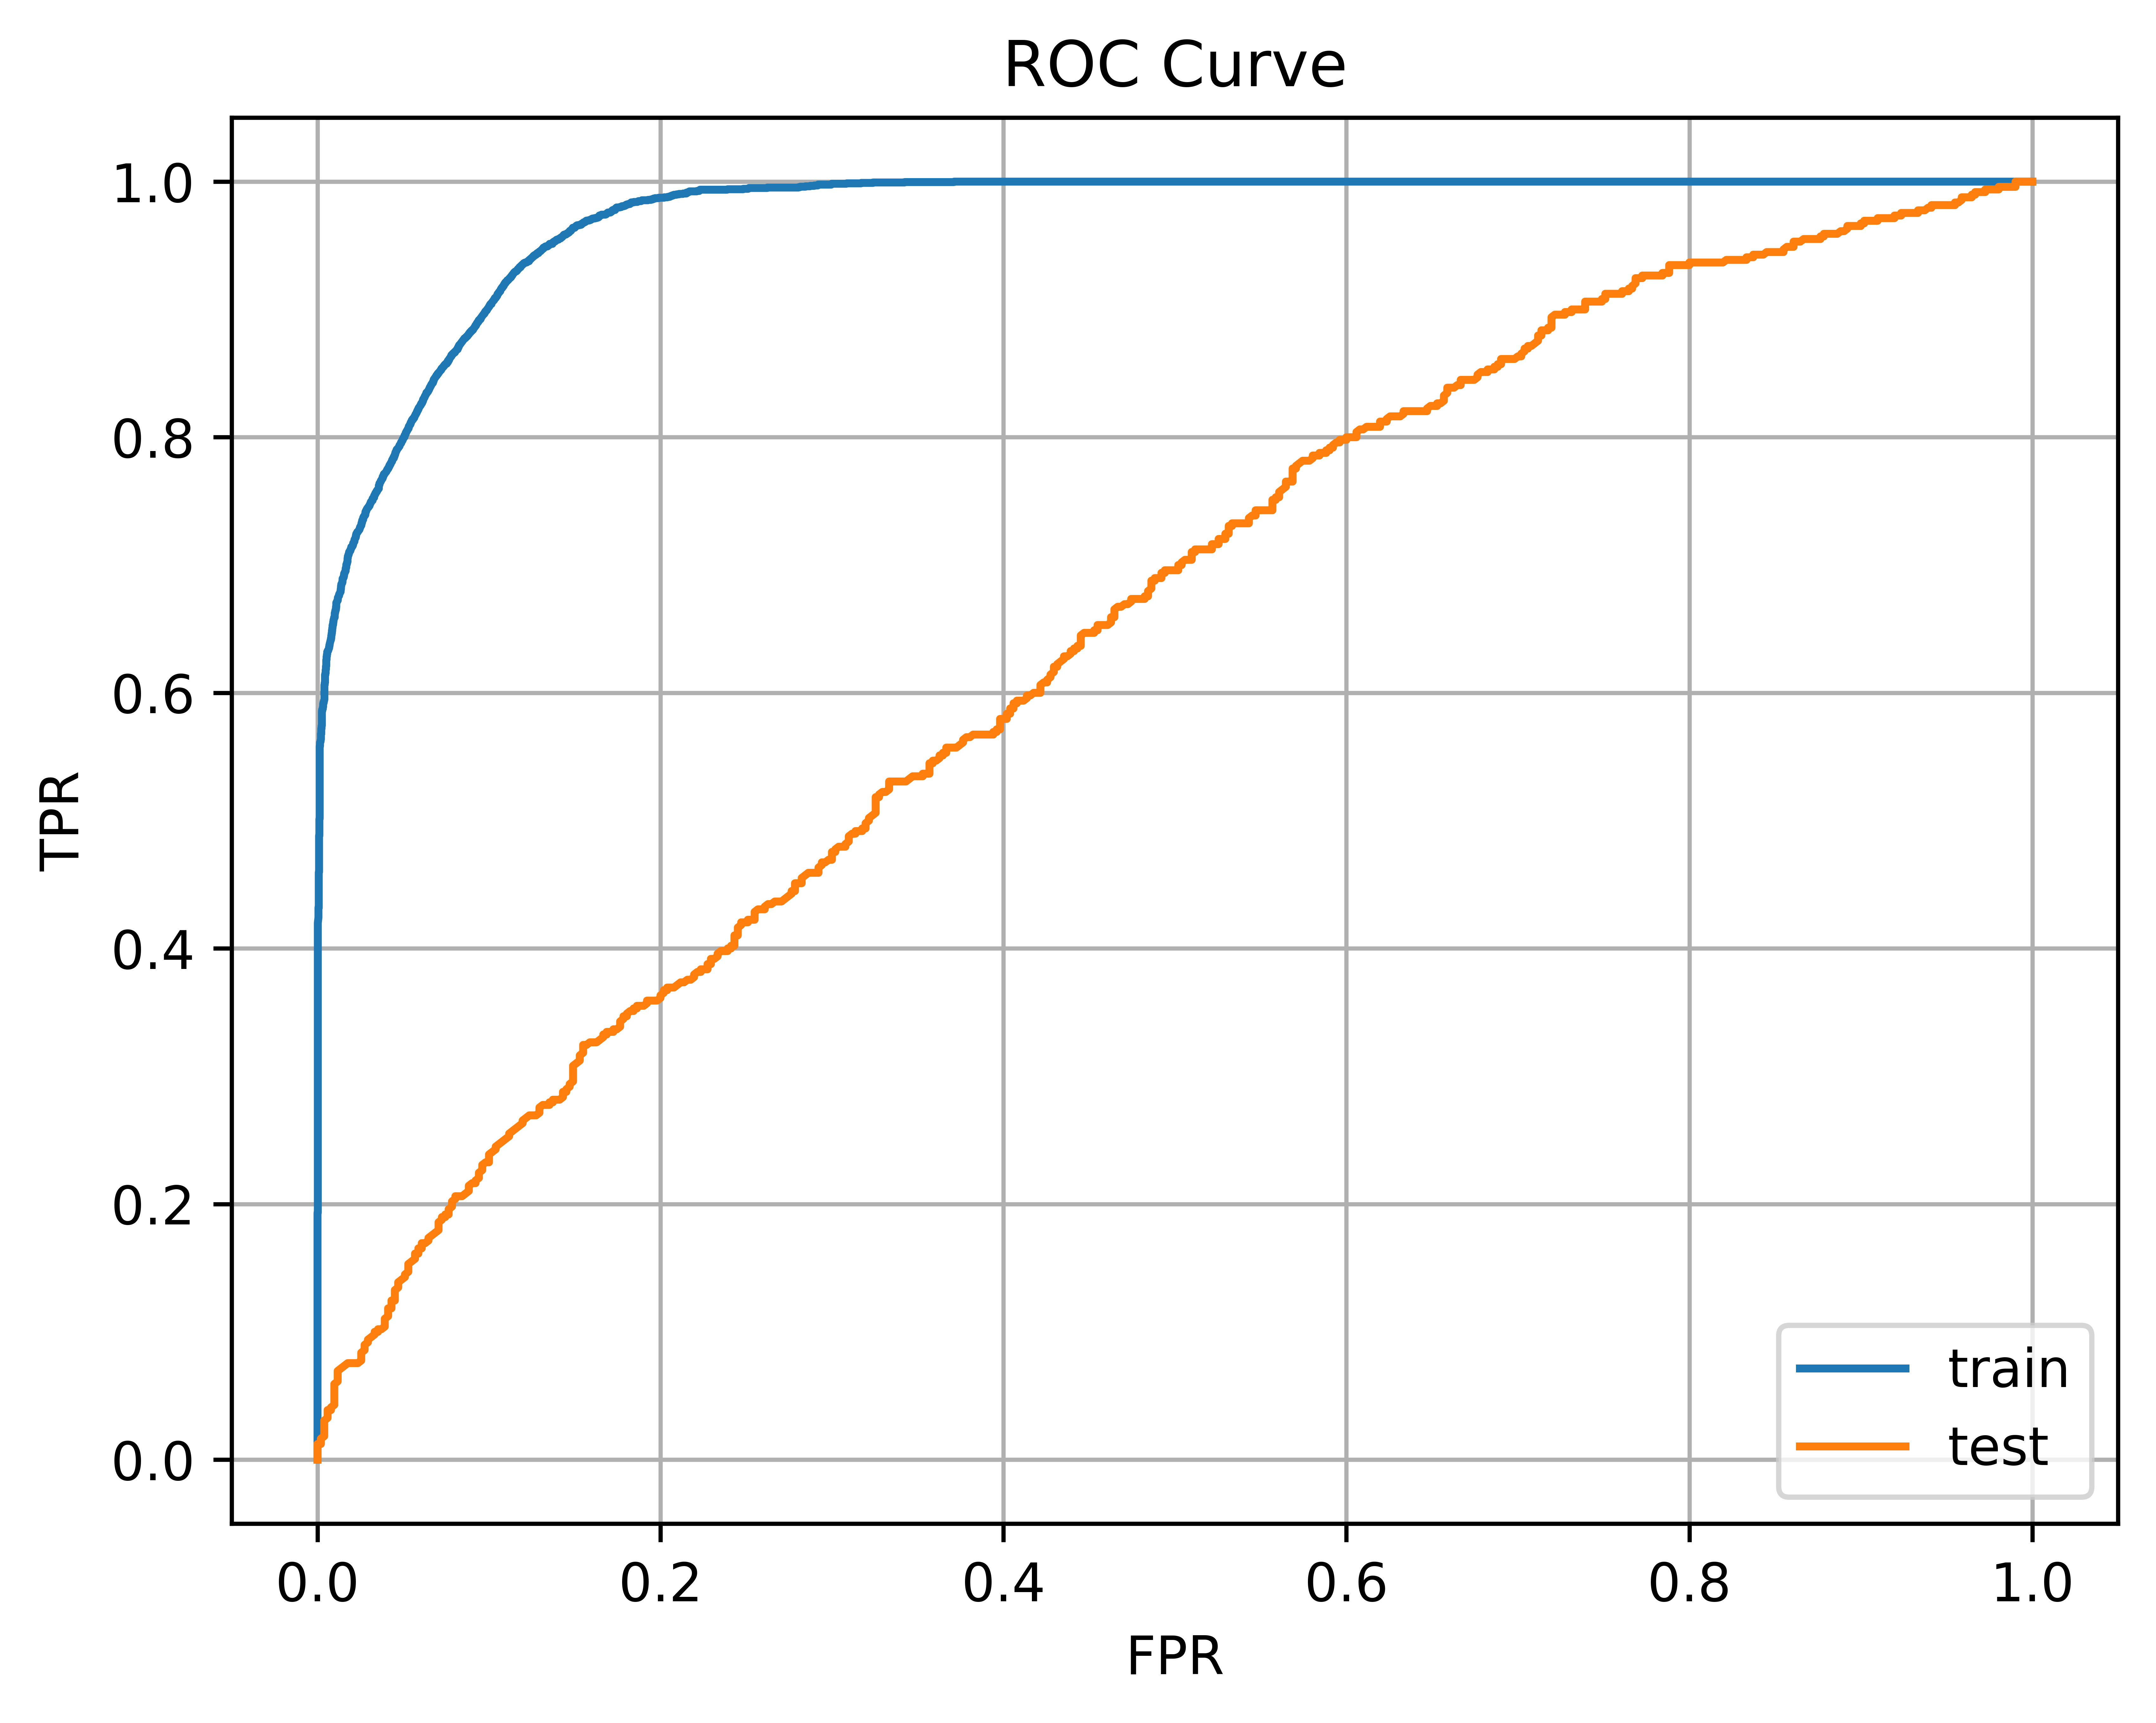

In [ ]:
# Create the roc curve
testfpr, testtpr, _ = roc_curve(true_vals, predictions[:,1], pos_label = 1)
trainfpr, traintpr, _ = roc_curve(train_true_vals, train_predictions[:,1], pos_label = 1)

# Create a dataframe of fpr and tpr to create visual
testRocDf = pd.DataFrame({'fpr': testfpr, 'tpr': testtpr, 'data':['test']*len(testtpr)})
trainRocDf = pd.DataFrame({'fpr': trainfpr, 'tpr': traintpr, 'data': ['train'] * len(traintpr)})
rocDf = pd.concat([testRocDf, trainRocDf])
plt.rcParams['figure.dpi'] = 1200
plt.plot(trainRocDf['fpr'], trainRocDf['tpr'],label = 'train')
plt.plot(testRocDf['fpr'], testRocDf['tpr'],label = 'test')
plt.legend()
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

# OCR

In [ ]:
import torch

In [ ]:
!pip install -q easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.9 MB/s eta 0:00:00


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/NLP_Final_Project/"

In [ ]:
image_path = path + "img/98734.png"

In [ ]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image_path)
test = result
print(type(test))

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete<class 'list'>


In [ ]:
general_meme_list = []
for i in range(len(test)):
  meme_text = []
  meme_text.append(test[i][1])
  str_meme = ''.join(meme_text)
  general_meme_list.append(str_meme)

In [ ]:
print(general_meme_list)

['things white people do', 'Smloke r', 'suck at', 'lie about', 'methers', 'their lamily =', '~fuck', 'Iass $', 's shootiys', 'blacks', 'Lfrom [', 'steal [', 'melh', 'animals', 'shorts', 'fuck =', 'racist', 'heing']


In [ ]:
str_list = ' '.join(general_meme_list)
print(str_list)

things white people do Smloke r suck at lie about methers their lamily = ~fuck Iass $ s shootiys blacks Lfrom [ steal [ melh animals shorts fuck = racist heing


In [ ]:
image_path_2 = path + "img/98613.png"
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image_path_2)
test = result

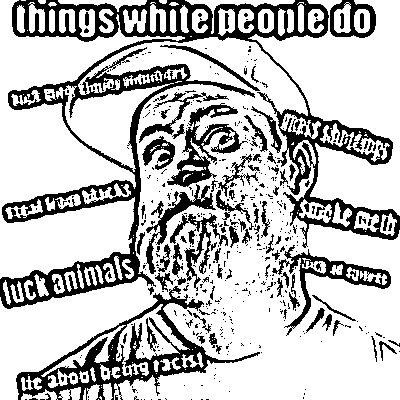

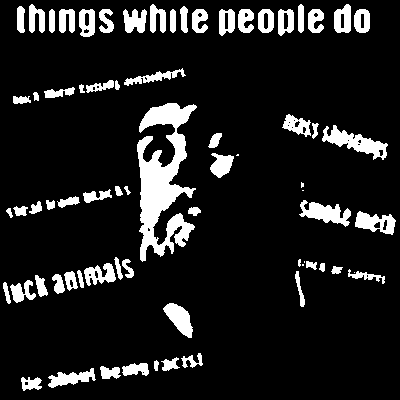

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread(image_path,0)
image = cv2.medianBlur(image,5)
binarized_image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
cv2_imshow(binarized_image)
ret,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
cv2_imshow(th1)

In [ ]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image)
test = result

In [ ]:
print(test)

[([[8, 0], [378, 0], [378, 44], [8, 44]], 'things white people do', 0.5282730800869629), ([[17, 375], [45, 375], [45, 393], [17, 393]], 'Mt', 0.1500237410234292), ([[279.0220279500418, 108.16388105512118], [326.8914333607626, 118.20024183638482], [320.9779720499582, 142.83611894487882], [274.1085666392374, 132.7997581636152]], 'a', 0.13789975290743328), ([[321.36271106700684, 115.0684709082316], [397.99906293922436, 139.9250234265194], [388.63728893299316, 166.9315290917684], [312.00093706077564, 142.0749765734806]], 'hbieirs', 0.005620031881555872), ([[298.15350102802535, 192.12190349528618], [357.94358336947334, 205.42093441912], [351.84649897197465, 231.87809650471382], [291.05641663052666, 218.57906558088]], 'Icke', 0.009976580739021301), ([[353.07899166023174, 205.14487414671834], [404.77403429542414, 211.85775058423712], [399.92100833976826, 241.85512585328166], [348.22596570457586, 235.14224941576288]], 'Glb', 0.046476817246473), ([[42.17157287525381, 267.1715728752538], [138.46

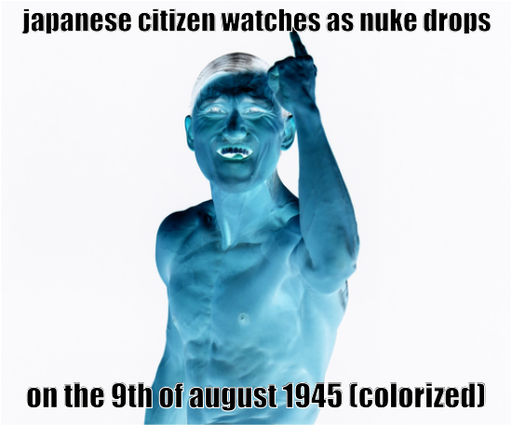

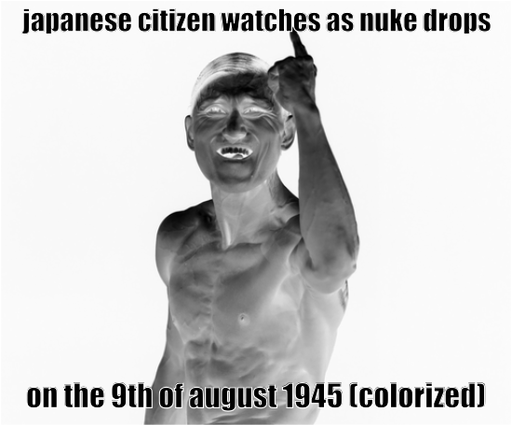

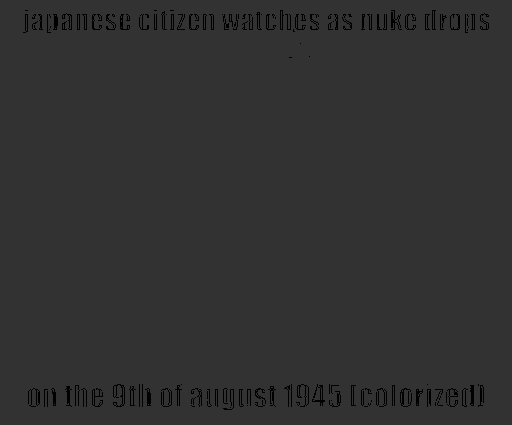

[([[17, 3], [497, 3], [497, 39], [17, 39]],
  'jananese citizen watches aS nuke drons',
  0.7399587471623845),
 ([[23, 376], [490, 376], [490, 417], [23, 417]],
  'on the 9th of august 1945 (colorized)',
  0.8210712576953274)]

In [ ]:
image = cv2.imread(image_path_2)
image_not = cv2.bitwise_not(image)
image_not_gray = cv2.cvtColor(image_not, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(image_not_gray,0,50,cv2.THRESH_BINARY)

cv2_imshow(image_not)
cv2_imshow(image_not_gray)
cv2_imshow(th1)
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image_not_gray)
result

In [ ]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image)
result

[([[18, 6], [496, 6], [496, 38], [18, 38]],
  'japanese citizen watches aS nuke drops',
  0.7395517355140414),
 ([[23, 377], [493, 377], [493, 417], [23, 417]],
  'on the 9th of august 1945 (colorized)',
  0.7957721703060072)]

In [ ]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(th1)
result

[([[17, 4], [497, 4], [497, 40], [17, 40]],
  'japanese CitiZm QWatchcs as fukc irops',
  0.08580594821653831),
 ([[23, 379], [491, 379], [491, 417], [23, 417]],
  '@M Ime 98 @f augus_ 1945 [colorized)',
  0.34641458690757504)]

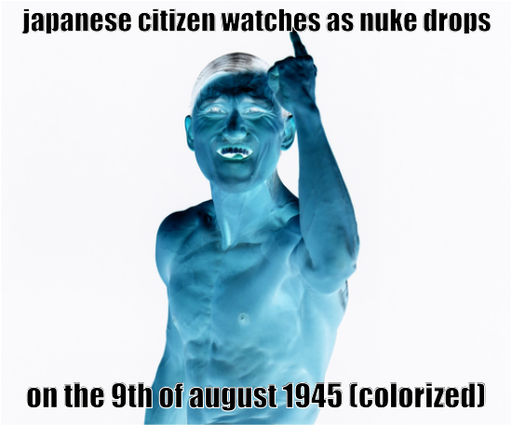

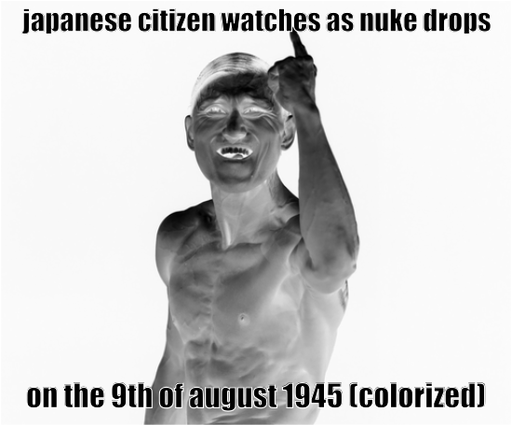

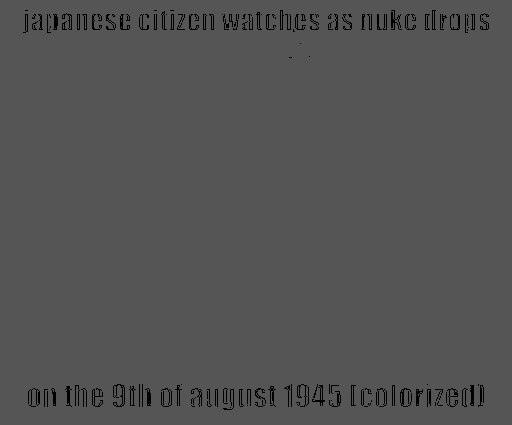

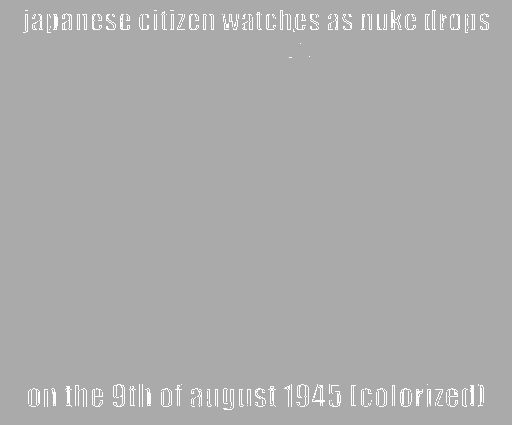

[([[18, 5], [494, 5], [494, 37], [18, 37]],
  'japanesc citizcn WWztchcs as Iukc iIrops',
  0.11980269377801753),
 ([[23, 379], [491, 379], [491, 416], [23, 416]],
  'OM tme 98l of augus_ 1445 [colorized)',
  0.1043739166685215)]

In [ ]:
image = cv2.imread(image_path_2)
image_not = cv2.bitwise_not(image)
image_not_gray = cv2.cvtColor(image_not, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(image_not_gray,0,85,cv2.THRESH_BINARY)
th1_not = cv2.bitwise_not(th1)

cv2_imshow(image_not)
cv2_imshow(image_not_gray)
cv2_imshow(th1)
cv2_imshow(th1_not)
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(th1_not)
result

In [ ]:
import os
unzipped_path = path + '/img/'

file_names = []
for filename in os.listdir(unzipped_path):
  if filename.endswith(".png"):
    file_names.append(filename)

done!


In [ ]:
print(file_names)

['91584.png', '91482.png', '91842.png', '92058.png', '91862.png', '91570.png', '91430.png', '91385.png', '92064.png', '91756.png', '91724.png', '91374.png', '91736.png', '91365.png', '91453.png', '91563.png', '92015.png', '91367.png', '91750.png', '91786.png', '91372.png', '91853.png', '91375.png', '91537.png', '91468.png', '91654.png', '91602.png', '91845.png', '91806.png', '92041.png', '91340.png', '91847.png', '91674.png', '91527.png', '91428.png', '91856.png', '91765.png', '91738.png', '91763.png', '91402.png', '91675.png', '91805.png', '91683.png', '91803.png', '91802.png', '91840.png', '91764.png', '91708.png', '92046.png', '91638.png', '92013.png', '92038.png', '91574.png', '92056.png', '91432.png', '92517.png', '92453.png', '92418.png', '92584.png', '92501.png', '92567.png', '92147.png', '92154.png', '92640.png', '92541.png', '92180.png', '92385.png', '92547.png', '92407.png', '92354.png', '92430.png', '92381.png', '92601.png', '92413.png', '92081.png', '92157.png', '92170.png'

In [ ]:
unzipped_image_folder_path = path +
transcribed_memes_list = []

for item in range(len(file_names)):
  image_path= unzipped_image_folder_path + file_names[item]
  reader = easyocr.Reader(['en'], gpu = True)
  result = reader.readtext(image_path)
  test = result
  full_meme_list = []
  for i in range(len(test)):
    meme_text = []
    meme_text.append(test[i][1])
    str_meme = ''.join(meme_text)
    full_meme_list.append(str_meme)
  str_list = ''.join(full_meme_list)
  transcribed_memes_list.append(str_list)

print(len(transcribed_memes_list))

In [ ]:
train_data.dtypes

id               int64
img             object
label            int64
text            object
sentiment      float64
text_length      int64
dtype: object

In [ ]:
import csv
csv_data = []
for i, row in train_data.iterrows():
    # Adding data to the CSV list
    csv_data.append({
        "seq_ids": i + 1,
        "id": row["id"],
        "Fulltext": row["text"],
        "text": row["text"],
        "img": row["img"],
        "clean_text": row["text"]
    })

# Specify the CSV file path as "new_merged.csv"
csv_file_path = "/content/drive/MyDrive/NLP_Final_Project/new_merged.csv"

# Write data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    fieldnames = ["seq_ids", "id", "Fulltext", "text", "img", "clean_text"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Write data rows
    writer.writerows(csv_data)

print(f"CSV file '{csv_file_path}' created successfully.")

CSV file '/content/drive/MyDrive/NLP_Final_Project/img/new_merged.csv' created successfully.


# TF_IDF

In [ ]:
from sklearn.datasets import load_files
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
path = "/content/drive/MyDrive/NLP_Final_Project/"

In [ ]:
train_data = pd.read_csv(path+'new_merged.csv')

In [ ]:
train_data

Unnamed: 0.1  Unnamed: 0     id  \
0                 0           0  42953   
1                 1           1  23058   
2                 2           2  13894   
3                 3           3  37408   
4                 4           4  82403   
...             ...         ...    ...   
12135         12135       13335  71352   
12136         12136       13336   2164   
12137         12137       13337   3587   
12138         12138       13338  47839   
12139         12139       13339  34281   

                                                Fulltext  \
0      its their character not their color that matte...   
1      don't be afraid to love again everyone is not ...   
2      putting bows on your pet  [[], ['Korat', 'Russ...   
3      i love everything and everybody! except for sq...   
4      everybody loves chocolate chip cookies, even h...   
...                                                  ...   
12135  fighting for gay rights Woman Woman Woman Girl...   
12136  that feeling when you finish your homework in ...   
12137  the day that shook new york city  [['9/11 Memo...   
12138  one of the first prototypes of the atom bomb  ...   
12139  today feels like a kinda day where i just wann...   

                                                    text            img  \
0       its their character not their color that matters  img/42953.png   
1      don't be afraid to love again everyone is not ...  img/23058.png   
2                               putting bows on your pet  img/13894.png   
3      i love everything and everybody! except for sq...  img/37408.png   
4      everybody loves chocolate chip cookies, even h...  img/82403.png   
...                                                  ...            ...   
12135                            fighting for gay rights  img/71352.png   
12136  that feeling when you finish your homework in ...  img/02164.png   
12137                   the day that shook new york city  img/03587.png   
12138       one of the first prototypes of the atom bomb  img/47839.png   
12139  today feels like a kinda day where i just wann...  img/34281.png   

       label                                         clean text  
0          0  its their character not their color that matte...  
1          0  dont be afraid to love again everyone is not l...  
2          0  putting bows on your pet, Korat, Russian Blue,...  
3          0  i love everything and everybody! except for sq...  
4          0  everybody loves chocolate chip cookies, even h...  
...      ...                                                ...  
12135      0  fighting for gay rights Female Female Female F...  
12136      0  that feeling when you finish your homework in ...  
12137      0  the day that shook new york city9/11 Memorial ...  
12138      0       one of the first prototypes of the atom bomb  
12139      0  today feels like a kinda day where i just wann...  

[12140 rows x 8 columns]

In [ ]:
text = []
for i in train_data['text']:
  text.append(i)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',decode_error='ignore')
tfidf_matrix = vectorizer.fit_transform(text)
scaler = StandardScaler(with_mean=False)
scaled_tfidf_matrix = scaler.fit_transform(tfidf_matrix)

In [ ]:
tfidf_matrix.shape

(12140, 9538)

In [ ]:
train_cut = 8000

In [ ]:
import numpy as np

In [ ]:
number_of_folds = 10
seedsForModel = 7
totalScore = 'accuracy'
gridParams = {}
gridParams['C'] = [0.1,0.2,0.3,0.5,0.8,1,5,13,15]
gridParams['solver'] = ['newton-cg','lbfgs','liblinear','sag','saga']
targetModel = LogisticRegression(max_iter = 10000)
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [ ]:
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))
gridParams = {}
gridParams['alpha'] = [0.001,0.01,0.05,0.1,0.5,1,1.5,2]
targetModel = MultinomialNB()
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))
gridParams = {}
gridParams['n_estimators'] = [10,50,100,150,200]
gridParams['max_features'] = ['auto','sqrt','log2']
gridParams['max_depth'] = [3,4,5,6,7,8,9,10]
targetModel = RandomForestClassifier()
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))

Best : 0.6741350906095552 Using {'C': 0.5, 'solver': 'newton-cg'}
Best : 0.6447281713344315 Using {'alpha': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best : 0.6326194398682043 Using {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}


In [ ]:
#SVM
gridParams = {'C':[0.1,0.2,0.3,0.5,0.8,1,5,13,15,20]}
targetModel = SVC(max_iter =100000)
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))
#KNN
gridParams = {}
gridParams['n_neighbors'] = [3,5,10,20,30]
gridParams['weights'] = ['uniform','distance']
targetModel = KNeighborsClassifier()
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))

Best : 0.6562602965403623 Using {'C': 0.5}
Best : 0.6322075782537068 Using {'n_neighbors': 30, 'weights': 'uniform'}


In [ ]:
tfidf_matrix[:train_cut]

<8000x9538 sparse matrix of type '<class 'numpy.float64'>'
	with 44712 stored elements in Compressed Sparse Row format>

In [ ]:
gridScore = grid.fit(X=tfidf_matrix, y=train_data['label'])


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
targetModels = {}
targetModels['LR'] = LogisticRegression(C=5,solver= 'saga')
targetModels['SVM'] = SVC(C=0.8)
targetModels['CART'] = RandomForestClassifier(max_depth=9,max_features='sqrt',n_estimators=10)
targetModels['MNB'] = MultinomialNB(alpha=1)
targetModels['KNN'] = KNeighborsClassifier(n_neighbors=30,weights='uniform')

In [ ]:
import matplotlib.pyplot as plt
##Logistic Regression
linearRegressionModel = LogisticRegression(C=5,solver = 'saga')
linearRegressionYScore = linearRegressionModel.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).decision_function(tfidf_matrix[train_cut:])
linearRegressionPredictions = linearRegressionModel.predict(tfidf_matrix[train_cut:])
linearRegressionFPR,linearRegressionTPR,linearRegressionThreshold = roc_curve(train_data['label'][train_cut:], linearRegressionPredictions)
linearRegressionROC_AUC = auc(linearRegressionFPR,linearRegressionTPR)
print('Accuracy for %s is %s' % ('Logistic Regression',accuracy_score(train_data['label'][train_cut:], linearRegressionPredictions)))
print(linearRegressionROC_AUC)

##SVM
SVM_Model = SVC(C=1)
SVMYScore = SVM_Model.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).decision_function(tfidf_matrix[train_cut:])
SVMPredictions = SVM_Model.predict(tfidf_matrix[train_cut:])
SVMFPR,SVMTPR,SVMThreshold = roc_curve(train_data['label'][train_cut:], SVMYScore)
SVMROCAUC = auc(SVMFPR,SVMTPR)
print('Accuracy for %s is %s' % ('SVM',accuracy_score(train_data['label'][train_cut:], SVMPredictions)))


##Random Forest
Random_Forest_Model = RandomForestClassifier(max_depth=9,max_features='sqrt',n_estimators=10)
Random_Forest_YScore = Random_Forest_Model.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).predict_proba(tfidf_matrix[train_cut:])
Random_ForestPredictions = Random_Forest_Model.predict(tfidf_matrix[train_cut:])
Random_ForestFPR,Random_ForestTPR_ForestTPR,Random_ForestThreshold = roc_curve(train_data['label'][train_cut:], Random_Forest_YScore[:, 1])
rf_roc_auc = auc(SVMFPR,SVMTPR)
print('Accuracy for %s is %s' % ('Random Forest',accuracy_score(train_data['label'][train_cut:], Random_ForestPredictions)))

##Naive Bayes
Naive_BayesModel = MultinomialNB(alpha=1)
Naive_BayesYScore = Naive_BayesModel.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).predict_proba(tfidf_matrix[train_cut:])
Naive_BayesPredictions = Naive_BayesModel.predict(tfidf_matrix[train_cut:])
Naive_BayesfprBayesfpr,Naive_BayestprBayestpr,Naive_Bayesthreshold = roc_curve(train_data['label'][train_cut:], Naive_BayesYScore[:, 1])
Naive_Bayesroc_auc = auc(Naive_BayesfprBayesfpr,Naive_BayestprBayestpr)
print('Accuracy for %s is %s' % ('Naive Bayes',accuracy_score(train_data['label'][train_cut:], Naive_BayesPredictions)))

##KNN
KNNTargetModel = KNeighborsClassifier(n_neighbors=30,weights='uniform')
KNNYScore = KNNTargetModel.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).predict_proba(tfidf_matrix[train_cut:])
KNNpredictions = KNNTargetModel.predict(tfidf_matrix[train_cut:])
knnfpr,knntpr,knnthreshold = roc_curve(train_data['label'][train_cut:], KNNYScore[:, 1])
knnrocauc = auc(SVMFPR,SVMTPR)
print('Accuracy for %s is %s' % ('KNN',accuracy_score(train_data['label'][train_cut:], KNNpredictions)))


Accuracy for Logistic Regression is 0.6231884057971014
0.5802523722952829
Accuracy for SVM is 0.6115942028985507
Accuracy for Random Forest is 0.5748792270531401
Accuracy for Naive Bayes is 0.5932367149758454
Accuracy for KNN is 0.5743961352657004


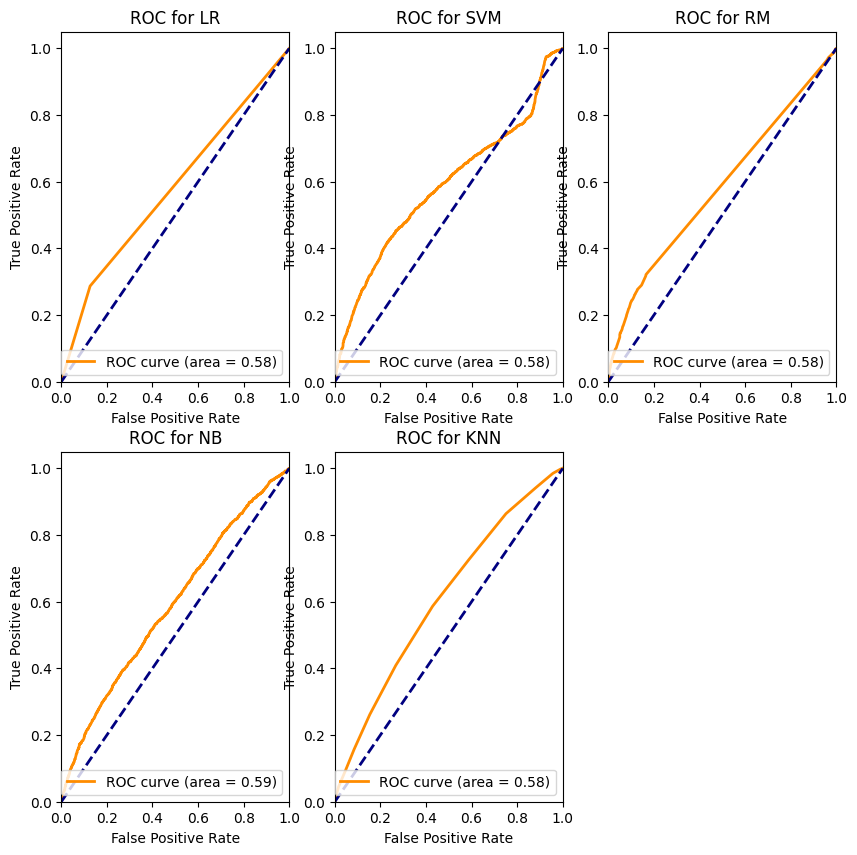

In [ ]:
lw = 2
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(231)
ax1.plot(linearRegressionFPR, linearRegressionTPR, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % linearRegressionROC_AUC)
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for LR')
plt.legend(loc="lower right")


ax2=fig.add_subplot(232)
ax2.plot(SVMFPR, SVMTPR, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % SVMROCAUC)
ax2.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM')
plt.legend(loc="lower right")


ax3=fig.add_subplot(233)
ax3.plot(Random_ForestFPR, Random_ForestTPR_ForestTPR, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % rf_roc_auc)
ax3.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for RM')
plt.legend(loc="lower right")


ax4=fig.add_subplot(234)
ax4.plot(Naive_BayesfprBayesfpr, Naive_BayestprBayestpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % Naive_Bayesroc_auc)
ax4.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for NB')
plt.legend(loc="lower right")


ax5=fig.add_subplot(235)
ax5.plot(knnfpr, knntpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % knnrocauc)
ax5.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for KNN')
plt.legend(loc="lower right")
plt.savefig('TF_IDF_ROC.jpg')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
LRmatrix = confusion_matrix(train_data['label'][train_cut:], linearRegressionPredictions)
print(LRmatrix)
precision = str(226/(131+226))
print('Precision is ' + precision)
recall = str(226/(226+1014))
print('Recall is ' + recall)

[[2073  300]
 [1260  507]]
Precision is 0.6330532212885154
Recall is 0.18225806451612903


In [ ]:
SVMmatrix = confusion_matrix(train_data['label'][train_cut:], SVMPredictions)
print(SVMmatrix)
precision = str(209/(130+209))
print('Precision is ' + precision)
recall = str(209/(209+1031))
print('Recall is ' + recall)

[[2200  173]
 [1435  332]]
Precision is 0.616519174041298
Recall is 0.1685483870967742


In [ ]:
RFmatrix = confusion_matrix(train_data['label'][train_cut:], Random_ForestPredictions)
print(RFmatrix)
precision = str(2/(2+0))
print('Precision is ' + precision)
recall = str(2/(2+1238))
print('Recall is ' + recall)

[[2366    7]
 [1753   14]]
Precision is 1.0
Recall is 0.0016129032258064516


In [ ]:
NBmatrix = confusion_matrix(train_data['label'][train_cut:], Naive_BayesPredictions)
print(NBmatrix)
precision = str(164/(123+164))
print('Precision is ' + precision)
recall = str(164/(164+1076))
print('Recall is ' + recall)

[[2234  139]
 [1545  222]]
Precision is 0.5714285714285714
Recall is 0.13225806451612904


In [ ]:
KNNmatrix = confusion_matrix(train_data['label'][train_cut:], KNNpredictions)
print(KNNmatrix)
precision = str(4/(4+3))
print('Precision is ' + precision)
recall = str(4/(4+1236))
print('Recall is ' + recall)

[[2365    8]
 [1754   13]]
Precision is 0.5714285714285714
Recall is 0.0032258064516129032


In [ ]:
#define a funcation that could draw confusion matrix
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name, rotation=90)
    plt.yticks(num_local, labels_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

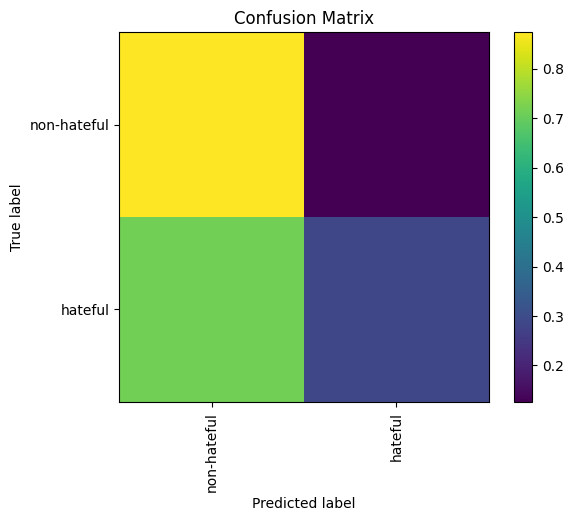

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(LRmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

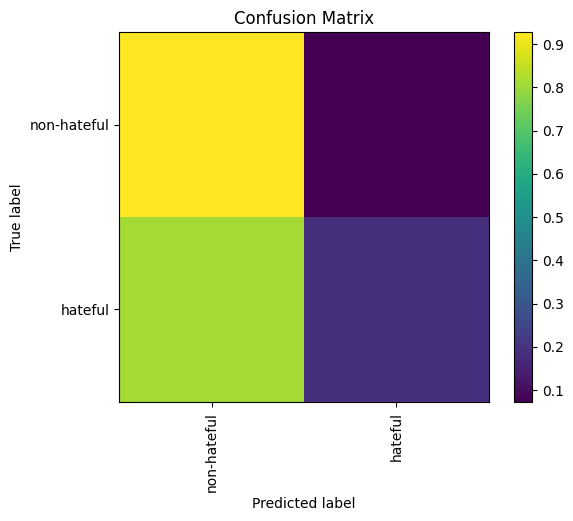

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(SVMmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

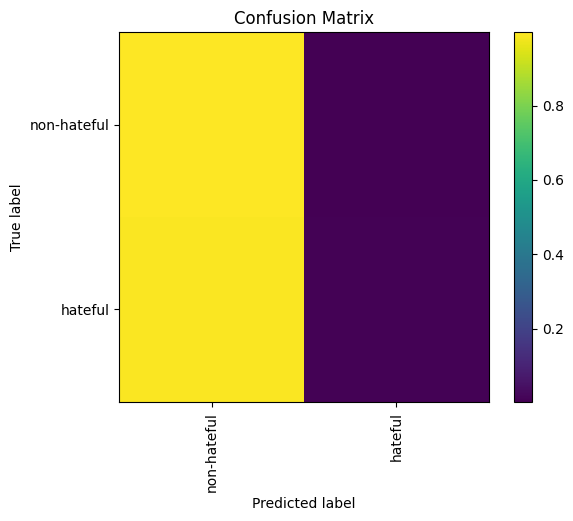

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(RFmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

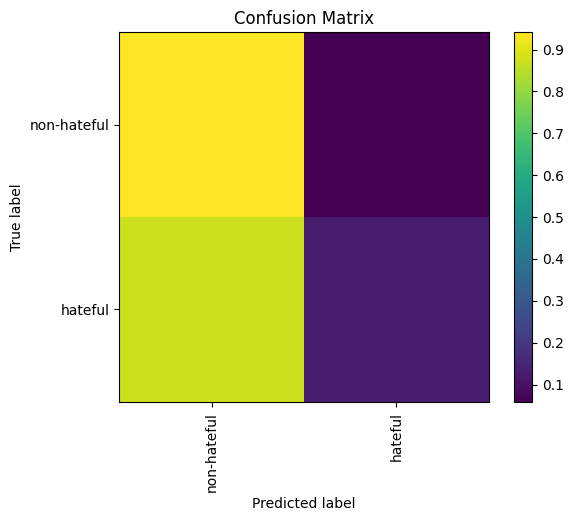

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(NBmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

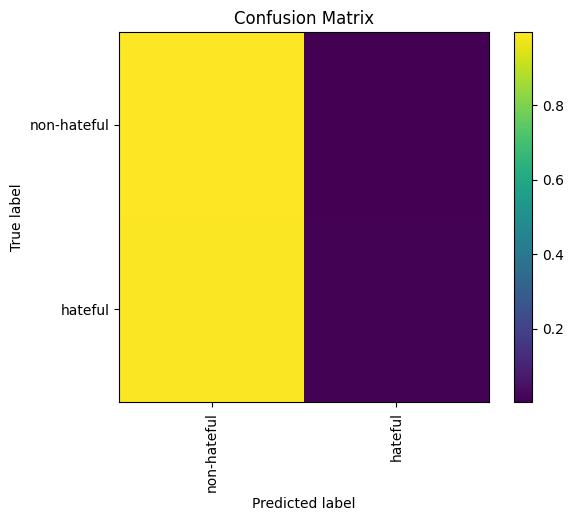

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(KNNmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

# RESNET

In [ ]:
path = "/content/drive/MyDrive/NLP_Final_Project/"

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_json(path + 'train.jsonl', lines=True)
dev_data = pd.read_json(path + 'dev.jsonl', lines=True)
test_data = pd.read_json(path + 'test.jsonl', lines=True)

In [ ]:
path1='drive/MyDrive/NLP_Final_Projectt/label_csv'

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train = pd.read_json(path + 'train.jsonl', lines=True)
dev_seen = pd.read_json(path + 'dev_seen.jsonl', lines=True)
dev_unseen = pd.read_json(path + 'dev_unseen.jsonl', lines=True)
test_seen = pd.read_json(path + 'test_seen.jsonl', lines=True)
test_unseen = pd.read_json(path + 'test_unseen.jsonl', lines=True)

In [ ]:
data = pd.concat([train,test_seen,test_unseen,dev_seen,dev_unseen])

In [ ]:
data

id            img  label  \
0    42953  img/42953.png      0   
1    23058  img/23058.png      0   
2    13894  img/13894.png      0   
3    37408  img/37408.png      0   
4    82403  img/82403.png      0   
..     ...            ...    ...   
535  83675  img/83675.png      0   
536  37198  img/37198.png      0   
537  48670  img/48670.png      0   
538   9863  img/09863.png      0   
539  97320  img/97320.png      0   

                                                  text  
0     its their character not their color that matters  
1    don't be afraid to love again everyone is not ...  
2                             putting bows on your pet  
3    i love everything and everybody! except for sq...  
4    everybody loves chocolate chip cookies, even h...  
..                                                 ...  
535                   i'm gonna be like phelps one day  
536  when you're so relaxed you can feel yourself g...  
537  look at this sandwich maker club i found on wi...  
538                             diverse group of women  
539  "when your dishwasher is broken so you take it...  

[12540 rows x 4 columns]

In [ ]:
data1 = data.drop_duplicates(subset=['img'])
data1

id            img  label  \
0    42953  img/42953.png      0   
1    23058  img/23058.png      0   
2    13894  img/13894.png      0   
3    37408  img/37408.png      0   
4    82403  img/82403.png      0   
..     ...            ...    ...   
135  82054  img/82054.png      0   
136  13749  img/13749.png      0   
137  85067  img/85067.png      0   
138  20541  img/20541.png      0   
139  60724  img/60724.png      0   

                                                  text  
0     its their character not their color that matters  
1    don't be afraid to love again everyone is not ...  
2                             putting bows on your pet  
3    i love everything and everybody! except for sq...  
4    everybody loves chocolate chip cookies, even h...  
..                                                 ...  
135                                puzzle level expert  
136  it's amazing how animal bodies and the human b...  
137              rare image of a worker picking cotton  
138               caught me cat and monkey today! this  
139  to the black guy reading this meme i am your f...  

[12140 rows x 4 columns]

In [ ]:
data_0 = data1[data1['label']==0]
data_1 = data1[data1['label']==1]

In [ ]:
normalize = T.Normalize(mean=[0.4, 0.4, 0.4], std=[0.2, 0.2, 0.2])
transform  = T.Compose([
         T.RandomResizedCrop(224),
         T.RandomHorizontalFlip(),
         T.ToTensor(),
         normalize,
])

In [ ]:
from torchvision import transforms as T
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder

In [ ]:
dataset = ImageFolder('drive/MyDrive/NLP_Final_Project/all_images/', transform=transform)

In [ ]:
print(dataset.classes)

['image_0', 'image_1']


In [ ]:
print(dataset.class_to_idx)

{'image_0': 0, 'image_1': 1}


In [ ]:
images = []
labels = []
for i in range(len(dataset)):
  print(i)
  image = dataset[i][0].detach().numpy()
  image2 = image.reshape(image.shape[1],image.shape[2],image.shape[0])
  print(image2.shape)
  images.append(image2)
  labels.append(dataset[i][1])

0
(224, 224, 3)
1
(224, 224, 3)
2
(224, 224, 3)
3
(224, 224, 3)
4
(224, 224, 3)
5
(224, 224, 3)
6
(224, 224, 3)
7
(224, 224, 3)
8
(224, 224, 3)
9
(224, 224, 3)
10
(224, 224, 3)
11
(224, 224, 3)
12
(224, 224, 3)
13
(224, 224, 3)
14
(224, 224, 3)
15
(224, 224, 3)
16
(224, 224, 3)
17
(224, 224, 3)
18
(224, 224, 3)
19
(224, 224, 3)
20
(224, 224, 3)
21
(224, 224, 3)
22
(224, 224, 3)
23
(224, 224, 3)
24
(224, 224, 3)
25
(224, 224, 3)
26
(224, 224, 3)
27
(224, 224, 3)
28
(224, 224, 3)
29
(224, 224, 3)
30
(224, 224, 3)
31
(224, 224, 3)
32
(224, 224, 3)
33
(224, 224, 3)
34
(224, 224, 3)
35
(224, 224, 3)
36
(224, 224, 3)
37
(224, 224, 3)
38
(224, 224, 3)
39
(224, 224, 3)
40
(224, 224, 3)
41
(224, 224, 3)
42
(224, 224, 3)
43
(224, 224, 3)
44
(224, 224, 3)
45
(224, 224, 3)
46
(224, 224, 3)
47
(224, 224, 3)
48
(224, 224, 3)
49
(224, 224, 3)
50
(224, 224, 3)
51
(224, 224, 3)
52
(224, 224, 3)
53
(224, 224, 3)
54
(224, 224, 3)
55
(224, 224, 3)
56
(224, 224, 3)
57
(224, 224, 3)
58
(224, 224, 3)
59
(224

In [ ]:
images = np.array(images)

In [ ]:
images.shape

(12140, 224, 224, 3)

In [ ]:
#convert the label to a numpy array
ylabel =np.array(labels)
train_label = ylabel.reshape(len(ylabel),1)
train_label
# ylabel
# ylabel=label.reshape(2087,1)
# ylabel

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
#count the distinct variables
(unique, counts) = np.unique(train_label, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print (frequencies)
print (len(unique))

[[   0 7634]
 [   1 4506]]
2


In [ ]:
#define different categories
class_types=['not hate','hate']

In [ ]:
#convert all variables to dummy variables
train_lab_categorical = tf.keras.utils.to_categorical(
    ylabel, num_classes=2, dtype='uint8')

In [ ]:
#split training set and test set (for both orginal labels and dummied labels)
from sklearn.model_selection import train_test_split
# train_im, test_im, train_lab, test_lab = train_test_split(img_list, train_lab_categorical, test_size=0.3,
#                                                             stratify=train_lab_categorical,
#                                                             random_state=100, shuffle = True)
train_im, test_im, train_lab, test_lab = train_test_split(images, train_label, test_size=0.20,
                                                            random_state=40, shuffle = True)
print(train_im.shape)

(9712, 224, 224, 3)


In [ ]:
#import necessary libraries for the dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from keras import regularizers

In [ ]:
##### Include Little Data Augmentation
batch_size = 64 # try several values

trainDataGen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,
                                                                width_shift_range=0.1,
                                                                height_shift_range = 0.1,
                                                                horizontal_flip=True)

validDatagen = tf.keras.preprocessing.image.ImageDataGenerator()

trainSetConv = trainDataGen.flow(train_im, train_lab, batch_size=batch_size) # train_lab is categorical
validSetConv = validDatagen.flow(test_im, test_lab, batch_size=batch_size) # so as valid_lab

In [ ]:
#define identity unit for the network
def res_identity(x, filters):

    x_add = x  # this will be used for addition with the residual block
    f1_val, f2_val = filters

    # first block
    x = Conv2D(f1_val, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    # second block # bottleneck (but size kept same with padding)
    x = Conv2D(f1_val, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    # third block activation used after adding the input
    x = Conv2D(f2_val, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    # x = Activation(activations.relu)(x)

    # add the input
    x = Add()([x, x_add])
    x = Activation(activations.relu)(x)

    return x

In [ ]:
#define convolutionary layers
def res_conv(x, s, filters):

    xSkipVal = x_val
    f1Val, f2Val = filters_val

    # First block
    x_val = Conv2D(f1Val, kernel_size=(1, 1), strides=(stride_val, stride_val), padding='valid', kernel_regularizer=l2(0.001))(x_val)
    x_val = BatchNormalization()(x_val)
    x_val = Activation(activations.relu)(x_val)

    # Second block
    x_val = Conv2D(f1Val, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x_val)
    x_val = BatchNormalization()(x_val)
    x_val = Activation(activations.relu)(x_val)

    # Third block
    x_val = Conv2D(f2Val, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x_val)
    x_val = BatchNormalization()(x_val)

    # Shortcut
    xSkipVal = Conv2D(f2Val, kernel_size=(1, 1), strides=(stride_val, stride_val), padding='valid', kernel_regularizer=l2(0.001))(xSkipVal)
    xSkipVal = BatchNormalization()(xSkipVal)

    # Add
    x_val = Add()([x_val, xSkipVal])
    x_val = Activation(activations.relu)(x_val)

    return x_val

In [ ]:
### Combine the above functions to build 50 layers resnet.
def resnet50():
    input_img = Input(shape=(train_images.shape[1], train_images.shape[2], train_images.shape[3])) # cifar 10 images size
    x = ZeroPadding2D(padding=(3, 3))(input_img)

    # 1st stage
    # here we perform maxpooling, see the figure above

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # 2nd stage
    # from here on only conv block and identity block, no pooling

    x = residual_conv_block(x, stride=1, filters=(64, 256))
    x = residual_identity_block(x, filters=(64, 256))
    x = residual_identity_block(x, filters=(64, 256))

    # 3rd stage

    x = residual_conv_block(x, stride=2, filters=(128, 512))
    x = residual_identity_block(x, filters=(128, 512))
    x = residual_identity_block(x, filters=(128, 512))
    x = residual_identity_block(x, filters=(128, 512))

    # 4th stage

    x = residual_conv_block(x, stride=2, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))

    # 5th stage

    x = residual_conv_block(x, stride=2, filters=(512, 2048))
    x = residual_identity_block(x, filters=(512, 2048))
    x = residual_identity_block(x, filters=(512, 2048))

    # ends with average pooling and dense connection

    x = AveragePooling2D((2, 2), padding='same')(x)

    x = Flatten()(x)

    x = Dense(len(class_types), activation='softmax', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01),
              activity_regularizer=regularizers.l1(0.01))(x)

    model = Model(inputs=input_img, outputs=x, name='RephrasedResnet50')

    return model

In [ ]:
import tensorflow as tf

In [ ]:
### Define some Callbacks
def lrdecay(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    return lr

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lrdecay)


def earlystop(mode):
  if mode=='acc':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=15, mode='max')
  elif mode=='loss':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, mode='min')
  return estop

In [ ]:
#show the structure of the network
resnet50_model.summary()

Model: "Resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

In [ ]:
#add optimizer, loss function and quality metrics to the model.
resnet50_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4),
                       metrics=['acc'])

In [ ]:
#Run the model
batch_size=batch_size

resnetTrain = resnet50_model.fit(trainSetConv,
                                  epochs=20,
                                  steps_per_epoch=train_im.shape[0]/batch_size,
                                  validation_steps=test_im.shape[0]/batch_size,
                                  validation_data=validSetConv,
                                  callbacks=[lrdecay])

151/151 [==============================] - 3337s 22s/step - loss: 29.8648 - acc: 0.4984 - val_loss: 56.3131 - val_acc: 1.0000 - lr: 0.0010


In [ ]:
#extract the last dense layer from the trained models
representationModel = Model(inputs=resnet50_model.inputs, outputs=resnet50_model.get_layer('flatten').output)

In [ ]:
#apply the layer to every ovservation
representationModel_output = representationModel.predict(train_im)

In [ ]:
representationModel_output.shape

(1669, 8192)

In [ ]:
representationModel_output_test = representationModel.predict(test_im)

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=0.1)

In [ ]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=2)
#train_PCA=pca.fit_transform(representationModel_output)


In [ ]:
from sklearn.metrics import accuracy_score
#test_PCA=pca.fit_transform(representationModel_output_test)
svm.fit(representationModel_output,train_lab)
predicts=svm.predict(representationModel_output_test)
accuracy_score(test_lab,predicts)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6449752883031301

In [ ]:
#construct the confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_lab, predicts)
matrix

array([[1566,    0],
       [ 862,    0]])

In [ ]:
#define a funcation that could draw confusion matrix
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name, rotation=90)
    plt.yticks(num_local, labels_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

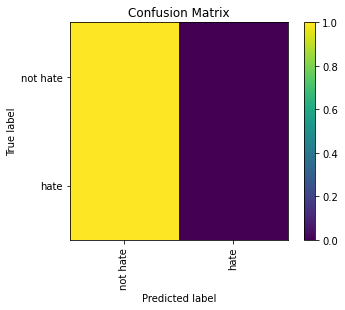

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(matrix, class_types, "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

# VisualBERT

In [ ]:
! pip install -q transformers
! pip install -q datasets
! pip install -q --upgrade tqdm

ERROR: Operation cancelled by user
ERROR: Operation cancelled by user


In [ ]:
!pip install pytorch-lightning

In [ ]:
import torch
torch.__version__

'2.1.0+cu118'

In [ ]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os

In [ ]:
import os
import shutil

dirpath = '/content/model-checkpoint'
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

In [ ]:
path = "/content/drive/MyDrive/NLP_Final_Project/"

In [ ]:
import pandas as pd
'''valSeen = pd.read_json(path+'dev_seen.jsonl',lines=True)
valUnseen= pd.read_json(path+'dev_unseen.jsonl',lines=True)
testSeen=pd.read_json(path+'testSeen.jsonl',lines=True)
testUnseen=pd.read_json(path+'testUnseen.jsonl',lines=True)
df_train =pd.read_json(path+'train.jsonl',lines=True)'''

"valSeen = pd.read_json(path+'dev_seen.jsonl',lines=True)\nvalUnseen= pd.read_json(path+'dev_unseen.jsonl',lines=True)\ntestSeen=pd.read_json(path+'testSeen.jsonl',lines=True)\ntestUnseen=pd.read_json(path+'testUnseen.jsonl',lines=True)\ndfTrain =pd.read_json(path+'train.jsonl',lines=True)"

In [ ]:
df = pd.read_csv(path + 'new_merged.csv')
df_train = df[:8500]
df_val = df[8500:9540]
df_test = df[9540:]

In [ ]:
df_train.label.value_counts()

0    5481
1    3019
Name: label, dtype: int64

In [ ]:
df_train.label.value_counts()

0    5481
1    3019
Name: label, dtype: int64

In [ ]:
df_val.head()

Unnamed: 0.1  Unnamed: 0     id  \
8500          8500        8500   8291   
8501          8501        8504  46971   
8502          8502        8508   3745   
8503          8503        8512  83745   
8504          8504        8516  80243   

                                               Fulltext  \
8500  white people is this a shooting range Boy Woma...   
8501  bravery at its finest Man Man Man Boy Man Man ...   
8502  your order comes to $37.50 and your white priv...   
8503  it is time.. to send these parasites back to t...   
8504  mississippi wind chime  [['World War II', '20 ...   

                                                   text            img  label  \
8500              white people is this a shooting range  img/08291.png      1   
8501                              bravery at its finest  img/46971.png      1   
8502  your order comes to $37.50 and your white priv...  img/03745.png      1   
8503  it is time.. to send these parasites back to t...  img/83745.png      1   
8504                             mississippi wind chime  img/80243.png      1   

                                             clean text  
8500  white people is this a shooting rangeMale Male...  
8501  bravery at its finest Male Male Male Male Male...  
8502  your order comes to $37.50 and your white priv...  
8503  it is time.. to send these parasites back to t...  
8504  mississippi wind chimeWorld War II, 20 July pl...

In [ ]:
df_val.label.value_counts()

0    588
1    452
Name: label, dtype: int64

In [ ]:
df_test.label.value_counts()

0    1565
1    1035
Name: label, dtype: int64

In [ ]:
df_train['text_len'] = df_train['text'].str.split().str.len()
df_train['text_len'].describe()

<ipython-input-67-1e85daf4c0c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text_len'] = df_train['text'].str.split().str.len()


count    8500.000000
mean       11.742588
std         6.877021
min         1.000000
25%         7.000000
50%        10.000000
75%        15.000000
max        70.000000
Name: text_len, dtype: float64

In [ ]:
df_train['idx'] = df_train['id'].astype(str).str.zfill(5)
df_train.head()

<ipython-input-68-514eae170e5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['idx'] = df_train['id'].astype(str).str.zfill(5)


Unnamed: 0.1  Unnamed: 0     id  \
0             0           0  42953   
1             1           1  23058   
2             2           2  13894   
3             3           3  37408   
4             4           4  82403   

                                            Fulltext  \
0  its their character not their color that matte...   
1  don't be afraid to love again everyone is not ...   
2  putting bows on your pet  [[], ['Korat', 'Russ...   
3  i love everything and everybody! except for sq...   
4  everybody loves chocolate chip cookies, even h...   

                                                text            img  label  \
0   its their character not their color that matters  img/42953.png      0   
1  don't be afraid to love again everyone is not ...  img/23058.png      0   
2                           putting bows on your pet  img/13894.png      0   
3  i love everything and everybody! except for sq...  img/37408.png      0   
4  everybody loves chocolate chip cookies, even h...  img/82403.png      0   

                                          clean text  text_len    idx  
0  its their character not their color that matte...         8  42953  
1  dont be afraid to love again everyone is not l...        12  23058  
2  putting bows on your pet, Korat, Russian Blue,...         5  13894  
3  i love everything and everybody! except for sq...        11  37408  
4  everybody loves chocolate chip cookies, even h...         7  82403

In [ ]:
df_val['idx'] = df_val['id'].astype(str).str.zfill(5)
df_test['idx'] = df_test['id'].astype(str).str.zfill(5)

<ipython-input-69-ea930b2761a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['idx'] = df_val['id'].astype(str).str.zfill(5)
<ipython-input-69-ea930b2761a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['idx'] = df_test['id'].astype(str).str.zfill(5)


In [ ]:
df_train.shape, df_val.shape

((8500, 10), (1040, 9))

## Compute Class Weight

In [ ]:
from sklearn.utils import class_weight
y_train = df_train["label"].values.tolist()
class_weights = class_weight.compute_class_weight(class_weight ='balanced',
                                                 classes = np.unique(y_train),
                                                 y = y_train)
print(class_weights)

[0.77540595 1.40775091]


In [ ]:
df_train.label.value_counts()

0    5481
1    3019
Name: label, dtype: int64

## Load as a dataset

In [ ]:
from datasets import list_metrics, load_metric
metricsList = list_metrics()
print(metricsList)

['accuracy', 'bertscore', 'bleu', 'bleurt', 'brier_score', 'cer', 'character', 'charcut_mt', 'chrf', 'code_eval', 'comet', 'competition_math', 'coval', 'cuad', 'exact_match', 'f1', 'frugalscore', 'glue', 'google_bleu', 'indic_glue', 'mae', 'mahalanobis', 'mape', 'mase', 'matthews_correlation', 'mauve', 'mean_iou', 'meteor', 'mse', 'nist_mt', 'pearsonr', 'perplexity', 'poseval', 'precision', 'r_squared', 'recall', 'rl_reliability', 'roc_auc', 'rouge', 'sacrebleu', 'sari', 'seqeval', 'smape', 'spearmanr', 'squad', 'squad_v2', 'super_glue', 'ter', 'trec_eval', 'wer', 'wiki_split', 'xnli', 'xtreme_s', 'AlhitawiMohammed22/CER_Hu-Evaluation-Metrics', 'BucketHeadP65/confusion_matrix', 'BucketHeadP65/roc_curve', 'DarrenChensformer/eval_keyphrase', 'DarrenChensformer/relation_extraction', 'Drunper/metrica_tesi', 'Felipehonorato/eer', 'GMFTBY/dailydialog_evaluate', 'GMFTBY/dailydialogevaluate', 'He-Xingwei/sari_metric', 'Ikala-allen/relation_extraction', 'JP-SystemsX/nDCG', 'Josh98/nl2bash_m', '

In [ ]:
acc_metric = load_metric('accuracy')
f1_metric = load_metric('f1')
precision_metric = load_metric('precision')
recall_metric = load_metric('recall')

## Create Dataset function

In [ ]:
from transformers import BertTokenizer, VisualBertForPreTraining, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

## Load Visual Embedding features

In [ ]:
import torch

In [ ]:
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
feature_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k').to('cuda')

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
class HatefulMemesData(Dataset):
    def __init__(self, df, tokenizer, sequence_length,
                 print_text=False):

        self.sequence_length = sequence_length
        self.tokenizer = tokenizer
        self.print_text = print_text

        texts = df["text"].values.tolist()
        labels = df["label"].values.tolist()
        images = df["img"].values.tolist()
        ids =  df["idx"].values.tolist()

        self.dataset = []
        for i, inp in enumerate(texts):
            self.dataset.append({"text": inp, "label": labels[i], 'idx': ids[i], 'image': images[i]})

    def __len__(self):
        return len(self.dataset)


    def tokenize_data(self, example):

        idx = example['idx']
        idx = [idx] if isinstance(idx, str) else idx
        # encoded_dict = tokenizer.batch_encode_plus(example['text'], padding='max_length', max_length=max_len, truncation=True, return_tensors='pt')
        encoded_dict = tokenizer(example['text'], padding='max_length', max_length=self.sequence_length, truncation=True, return_tensors='pt')
        tokens = encoded_dict['input_ids']
        token_type_ids = encoded_dict['token_type_ids']
        attn_mask = encoded_dict['attention_mask']

        targets = torch.tensor(example['label']).type(torch.int64)

        ## Get Visual Embeddings
        try:
            img = example['image']
            img = Image.open(os.path.join('hateful_memes', img))
            img = np.array(img)
            img = img[...,:3]
            inputs = feature_extractor(images=img, return_tensors="pt")
            outputs = feature_model(**inputs.to('cuda'))
            visual_embeds = outputs.last_hidden_state
            visual_embeds = visual_embeds.cpu()
        except:
            # print("Error with Id: ", idx)
            visual_embeds = np.zeros(shape=(197, 768), dtype=float)
        # visual_embeds = visual_embeds.repeat(1,1,2)

        visual_attention_mask = torch.ones(visual_embeds.shape[:-1], dtype=torch.int64)
        visual_token_type_ids = torch.ones(visual_embeds.shape[:-1], dtype=torch.int64)

        inputs={"input_ids": tokens.squeeze(),
            "attention_mask": attn_mask.squeeze(),
            "token_type_ids": token_type_ids.squeeze(),
            "visual_embeds": visual_embeds.squeeze(),
            "visual_token_type_ids": visual_token_type_ids.squeeze(),
            "visual_attention_mask": visual_attention_mask.squeeze(),
            "label": targets.squeeze()
        }

        return inputs

    def __getitem__(self, index):
        inputs = self.tokenize_data(self.dataset[index])

        if self.print_text:
            for k in inputs.keys():
                print(k, inputs[k].shape, inputs[k].dtype)

        return inputs

In [ ]:
dataset = HatefulMemesData(df_val, tokenizer, 50, True)

In [ ]:
example1 = dataset[100]

input_ids torch.Size([50]) torch.int64
attention_mask torch.Size([50]) torch.int64
token_type_ids torch.Size([50]) torch.int64
visual_embeds (197, 768) float64
visual_token_type_ids torch.Size([197]) torch.int64
visual_attention_mask torch.Size([197]) torch.int64
label torch.Size([]) torch.int64


## Fine-Tune Model

In [ ]:
from transformers import BertTokenizer, VisualBertModel, TrainingArguments, Trainer, VisualBertConfig
configuration = VisualBertConfig.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre',
                                                hidden_dropout_prob=0.3, attention_probs_dropout_prob=0.3)
model = VisualBertModel.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre', config=configuration)


In [ ]:
model = model.double()

## Tuning using Pytorch Lightning

In [ ]:
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.loggers import WandbLogger
from datasets import load_metric
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from transformers import (
    AdamW,
    VisualBertModel,
    get_linear_schedule_with_warmup
)
import logging
import argparse
import time
from torch.nn import CrossEntropyLoss
from sklearn.metrics import roc_auc_score

In [ ]:
# from pytorch_lightning.loggers.wandb import WandbLogger
import os
from pathlib import Path
from string import punctuation
import torch.nn as nn

## Look at Model Summary

In [ ]:
weights = [0.77510622, 1.40873991]
wt_tensor = torch.FloatTensor(weights).cuda()
print(wt_tensor)

tensor([0.7751, 1.4087], device='cuda:0')


In [ ]:
class VisualBERTClassifier(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(VisualBERTClassifier, self).__init__()
        configuration = VisualBertConfig.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre',
                                                hidden_dropout_prob=0.1, attention_probs_dropout_prob=0.1)
        self.visualbert = VisualBertModel.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre', config=configuration)
        self.embed_cls = nn.Linear(768, 1024)
        # self.visualbert = VisualBertModel.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre')
        self.num_labels = 2
        self.dropout = nn.Dropout(0.3)
        self.cls=  nn.Linear(768, self.num_labels)
        self.weight = torch.FloatTensor([class_weights]) #torch.FloatTensor([0.77510622, 1.40873991]),

        nSamples = [5178, 2849]
        normedWeights = [1 - (x / sum(nSamples)) for x in nSamples]
        self.loss_fct = CrossEntropyLoss(weight=torch.FloatTensor(normedWeights))


    def forward(self, input_ids, attention_mask, token_type_ids, visual_embeds, visual_attention_mask,
                visual_token_type_ids, labels):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        visual_embeds_cls = self.embed_cls(visual_embeds)
        outputs = self.visualbert(
                input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                visual_embeds=visual_embeds_cls,
                visual_attention_mask=visual_attention_mask,
                visual_token_type_ids=visual_token_type_ids,
            )

        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        logits = self.cls(pooled_output)
        reshaped_logits = logits.view(-1, self.num_labels)

        loss = self.loss_fct(reshaped_logits, labels.view(-1))

        return loss, reshaped_logits

In [ ]:
model = VisualBERTClassifier().to('cuda')

## Using HuggingFace Trainer

In [ ]:
from transformers import TrainingArguments, Trainer
batch_size = 24
seq_len = 50

In [ ]:
model = VisualBERTClassifier()
model = model.cuda()

In [ ]:
! pip install -U accelerate
! pip install -U transformers

In [ ]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.35.2', '0.24.1')

In [ ]:
!pip install transformers[torch]

In [ ]:
metric_name = "auroc"

args = TrainingArguments(
    output_dir = "model-checkpoint",
    seed = 110,
    evaluation_strategy = "steps",
    learning_rate=1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs= 100,
    weight_decay=0.05,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    eval_steps = 50,
    save_steps = 500,
    fp16 = False,
    gradient_accumulation_steps = 2
)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = acc_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels)
    precision = precision_metric.compute(predictions=predictions, references=labels)
    recall = recall_metric.compute(predictions=predictions, references=labels)
    auc_score = roc_auc_score(labels, predictions)
    return {"accuracy": acc['accuracy'], "auroc": auc_score,'f1':f1['f1'],'precision':precision['precision'],'recall':recall['recall']}

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset = HatefulMemesData(df_train,tokenizer=tokenizer, sequence_length=seq_len),
    eval_dataset =  HatefulMemesData(df_val,tokenizer=tokenizer, sequence_length=seq_len),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
resume_from ='/content/model-checkpoint/checkpoint-12000'
trainer.train()

In [ ]:
trainer.save_model('VisualBERT_classification_model')

In [ ]:
import numpy as np
trainer.evaluate()